# Statistical Inference on "La Liga" and "Champions League" datasets
- Enrique Almazán Sánchez
- Víctor Miguel Álvarez Camarero
- Matías Nevado García

## Sources

- La Liga Complete Dataset: https://www.kaggle.com/datasets/kishan305/la-liga-results-19952020
- UEFA Champions League 2016-2022 Data: sethttps://www.kaggle.com/datasets/cbxkgl/uefa-champions-league-2016-2022-data

## Introduction

Football, as one of the most popular sports worldwide, provides a rich and dynamic landscape for statistical analysis, will be analyzed through statistical inference within the context of two prestigious football competitions: "La Liga", the national spanish football, and the "Champions League", Europe's premier club competition.

The objective is to apply the principles learned in class throughout the course to real-world datasets as the oones mentioned. By analyzing data from these competitions,various aspects of the game will be studied, including team performance nationally and internationally, match outcomes and goal distribution between home and away as well as the relation between Real Madrid and comebacks.

The analysis will encompass a wide range of statistical techniques, including hypothesis testing, confidence intervals or regression analysis among others. By leveraging these tools, different patterns will be uncovered, as well as trends, and relationships within the datasets that can improve the understanding of football dynamics having different key areas of focus.

1. **Team Performance**

2. **Match Outcomes**

3. **Goal Distribution**


## Import dependencies

In [1]:
import utils as u

import pandas as pd
import numpy as np
from numpy import sqrt


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from scipy.stats import ttest_rel, t
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm


import ipywidgets as widgets

In [2]:
import warnings

# Desactivar todos los warnings
warnings.filterwarnings("ignore")

## Import Data

In [3]:
import pandas as pd
# Importing the LaLiga_Matches dataset
laliga_df = pd.read_csv("LaLiga_Matches.csv")

# Importing the UEFA Champions League 2016-2022 Data
ucl_df = pd.read_excel("UEFA Champions League 2016-2022 Data.xlsx", sheet_name='matches')

In [4]:
# Display the first few rows of the renamed and replaced La Liga dataset
laliga_df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,02-09-1995,La Coruna,Valencia,3,0,H,2,0,H
1,1995-96,02-09-1995,Sp Gijon,Albacete,3,0,H,3,0,H
2,1995-96,03-09-1995,Ath Bilbao,Santander,4,0,H,2,0,H
3,1995-96,03-09-1995,Ath Madrid,Sociedad,4,1,H,1,1,D
4,1995-96,03-09-1995,Celta,Compostela,0,1,A,0,0,D


In [5]:
# Display the first few rows of the renamed and replaced Champions League dataset
ucl_df.head()

,MATCH_ID,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,STADIUM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,PENALTY_SHOOT_OUT,ATTENDANCE
0,mt1,2021-2022,15-SEP-21 08.00.00.000000000 PM,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062
1,mt2,2021-2022,15-SEP-21 08.00.00.000000000 PM,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546
2,mt3,2021-2022,28-SEP-21 08.00.00.000000000 PM,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350
3,mt4,2021-2022,28-SEP-21 08.00.00.000000000 PM,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500
4,mt5,2021-2022,19-OCT-21 05.45.00.000000000 PM,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915


## Previous Requirements

### Filter La Liga dataset

As the Champions League dataset is from 2015-2016 season to 2021-2022 season, then for congruence La Liga dataset will be filtered to comprehend only those seasons.

In [6]:
# Extract the starting year from the "Season" column
laliga_df['Start_Year'] = laliga_df['Season'].str.extract(r'(\d{4})').astype(int)

# Filter the dataset for seasons between 2016 and 2022
f_laliga_df = laliga_df[(laliga_df['Start_Year'] >= 2016) & (laliga_df['Start_Year'] <= 2022)]

# Drop the temporary "Start_Year" column
f_laliga_df.drop(columns=['Start_Year'], inplace=True)

# Print the shape of the filtered dataset to verify
print("Shape of filtered La Liga dataset:", f_laliga_df.shape)

# Display the first few rows of the filtered dataset
print("\nFirst few rows of filtered La Liga dataset:")
f_laliga_df.head()

Shape of filtered La Liga dataset: (2660, 10)

First few rows of filtered La Liga dataset:


,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
8144,2016-17,19-08-2016,La Coruna,Eibar,2,1,H,0,0,D
8145,2016-17,19-08-2016,Malaga,Osasuna,1,1,D,0,0,D
8146,2016-17,20-08-2016,Barcelona,Betis,6,2,H,3,1,H
8147,2016-17,20-08-2016,Granada,Villarreal,1,1,D,0,0,D
8148,2016-17,20-08-2016,Sevilla,Espanol,6,4,H,3,3,D


### Renaming and Replacing

In order for both datasets to coincide and making possible the intersection between both, the columns as well as the name of some teams (those who plays both, the national league and the UCL) will be renamed or replaced respectively.

In [7]:
# Rename the columns of La Liga dataset
col_rename_laliga = {
    'Date': 'DATE_TIME', 
    'Season': 'SEASON',
    "HomeTeam": "HOME_TEAM", 
    "AwayTeam" : "AWAY_TEAM"
}

# Rename the columns of Champions League dataset
col_rename_ucl = {
    'HOME_TEAM_SCORE': 'FTHG',
    'AWAY_TEAM_SCORE': 'FTAG'
}

# Renaming
laliga_df.rename(columns=col_rename_laliga, inplace=True)
f_laliga_df.rename(columns=col_rename_laliga, inplace=True)
ucl_df.rename(columns=col_rename_ucl, inplace=True)

In [8]:
# Replace team names
team_replacements = {
    'Ath Madrid': 'Atlético Madrid',
    'Barcelona': 'FC Barcelona',
    'Sevilla': 'Sevilla FC',
    'Valencia': 'Valencia CF',
    'Villarreal': 'Villarreal CF'
}

laliga_df['HOME_TEAM'] = laliga_df['HOME_TEAM'].replace(team_replacements)
laliga_df['AWAY_TEAM'] = laliga_df['AWAY_TEAM'].replace(team_replacements)

f_laliga_df['HOME_TEAM'] = f_laliga_df['HOME_TEAM'].replace(team_replacements)
f_laliga_df['AWAY_TEAM'] = f_laliga_df['AWAY_TEAM'].replace(team_replacements)

### Date Time Column

Ensuring that the column regarding the date time of each of the matches is datetime data type is paramount.

In [9]:
# Ensure DATE_TIME column is datetime type
laliga_df['DATE_TIME'] = pd.to_datetime(laliga_df['DATE_TIME'], dayfirst=True)
f_laliga_df['DATE_TIME'] = pd.to_datetime(f_laliga_df['DATE_TIME'], dayfirst=True)
ucl_df['DATE_TIME'] = pd.to_datetime(ucl_df['DATE_TIME'], format='%d-%b-%y %I.%M.%S.%f %p')

## Exploratory Data Analysis

First of all, the first few raws of both datasets will again be displayed, which will also help for confirming that the previous requirements are correctly performed.

In [10]:
# Display the first few rows of the renamed and replaced La Liga dataset
laliga_df.head()

,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Start_Year
0,1995-96,1995-09-02,La Coruna,Valencia CF,3,0,H,2,0,H,1995
1,1995-96,1995-09-02,Sp Gijon,Albacete,3,0,H,3,0,H,1995
2,1995-96,1995-09-03,Ath Bilbao,Santander,4,0,H,2,0,H,1995
3,1995-96,1995-09-03,Atlético Madrid,Sociedad,4,1,H,1,1,D,1995
4,1995-96,1995-09-03,Celta,Compostela,0,1,A,0,0,D,1995


In [11]:
# Display the first few rows of the renamed and replaced Champions League dataset
ucl_df.head()

,MATCH_ID,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,STADIUM,FTHG,FTAG,PENALTY_SHOOT_OUT,ATTENDANCE
0,mt1,2021-2022,2021-09-15 20:00:00,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062
1,mt2,2021-2022,2021-09-15 20:00:00,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546
2,mt3,2021-2022,2021-09-28 20:00:00,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350
3,mt4,2021-2022,2021-09-28 20:00:00,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500
4,mt5,2021-2022,2021-10-19 17:45:00,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915


### Basic EDA for La Liga dataset

#### Shape

In [12]:
print("Shape:", laliga_df.shape)

Shape: (10883, 11)


#### Basic Statistics

In [13]:
print("\nBasic Statistics:")
print(laliga_df.describe())


Basic Statistics:
                           DATE_TIME          FTHG          FTAG  \
count                          10883  10883.000000  10883.000000   
mean   2009-06-12 10:58:08.523385088      1.553340      1.116971   
min              1995-09-02 00:00:00      0.000000      0.000000   
25%              2002-03-03 00:00:00      1.000000      0.000000   
50%              2009-05-03 00:00:00      1.000000      1.000000   
75%              2016-08-28 00:00:00      2.000000      2.000000   
max              2023-10-02 00:00:00     10.000000      8.000000   
std                              NaN      1.303854      1.114065   

               HTHG          HTAG    Start_Year  
count  10883.000000  10883.000000  10883.000000  
mean       0.687586      0.484977   2008.409354  
min        0.000000      0.000000   1995.000000  
25%        0.000000      0.000000   2001.000000  
50%        0.000000      0.000000   2008.000000  
75%        1.000000      1.000000   2016.000000  
max        6.00000

#### Data Types

In [14]:
print("\nData Types:")
print(laliga_df.dtypes)


Data Types:
SEASON                object
DATE_TIME     datetime64[ns]
HOME_TEAM             object
AWAY_TEAM             object
FTHG                   int64
FTAG                   int64
FTR                   object
HTHG                   int64
HTAG                   int64
HTR                   object
Start_Year             int32
dtype: object


#### Missing values

In [15]:
print("\nMissing Values:")
print(laliga_df.isnull().sum())


Missing Values:
SEASON        0
DATE_TIME     0
HOME_TEAM     0
AWAY_TEAM     0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
Start_Year    0
dtype: int64


### Champions League dataset

#### Shape

In [16]:
print("Shape:", ucl_df.shape)

Shape: (744, 10)


#### Basic Statistics

In [17]:
print("\nBasic Statistics:")
print(ucl_df.describe())


Basic Statistics:
                           DATE_TIME        FTHG        FTAG  \
count                            744  744.000000  744.000000   
mean   2019-06-03 18:27:47.338709504    1.681452    1.381720   
min              2016-09-13 19:45:00    0.000000    0.000000   
25%              2017-11-01 19:45:00    1.000000    0.000000   
50%              2019-05-04 20:00:00    1.000000    1.000000   
75%              2020-11-27 07:28:45    2.250000    2.000000   
max              2022-05-28 20:35:00    8.000000    8.000000   
std                              NaN    1.465394    1.345743   

       PENALTY_SHOOT_OUT    ATTENDANCE  
count              744.0    744.000000  
mean                 0.0  35786.936828  
min                  0.0      0.000000  
25%                  0.0  16592.500000  
50%                  0.0  38083.500000  
75%                  0.0  52258.750000  
max                  0.0  98299.000000  
std                  0.0  24000.039185  


#### Data Types

In [18]:
print("\nData Types:")
print(ucl_df.dtypes)


Data Types:
MATCH_ID                     object
SEASON                       object
DATE_TIME            datetime64[ns]
HOME_TEAM                    object
AWAY_TEAM                    object
STADIUM                      object
FTHG                          int64
FTAG                          int64
PENALTY_SHOOT_OUT             int64
ATTENDANCE                    int64
dtype: object


#### Missing values

In [19]:
print("\nMissing Values:")
print(ucl_df.isnull().sum())


Missing Values:
MATCH_ID             0
SEASON               0
DATE_TIME            0
HOME_TEAM            0
AWAY_TEAM            0
STADIUM              0
FTHG                 0
FTAG                 0
PENALTY_SHOOT_OUT    0
ATTENDANCE           0
dtype: int64


## Hypothesis

### 1) Is there a difference between number of goals scored at home matches and away matches?

This research question seeks to investigate whether there is a statistically significant disparity in the number of goals scored by football teams when playing at home compared to playing away. Understanding this difference is crucial for teams and coaches to develop effective match strategies based on different conditions. Moreover, fans and analysts could be interested to discern if there exists a home-field advantage phenomenon and its impact on match outcomes.

For this hypothesis both datasets are going to be used, using the filtered La Liga dataset in order for having coherence.

#### EDA



Visualization:


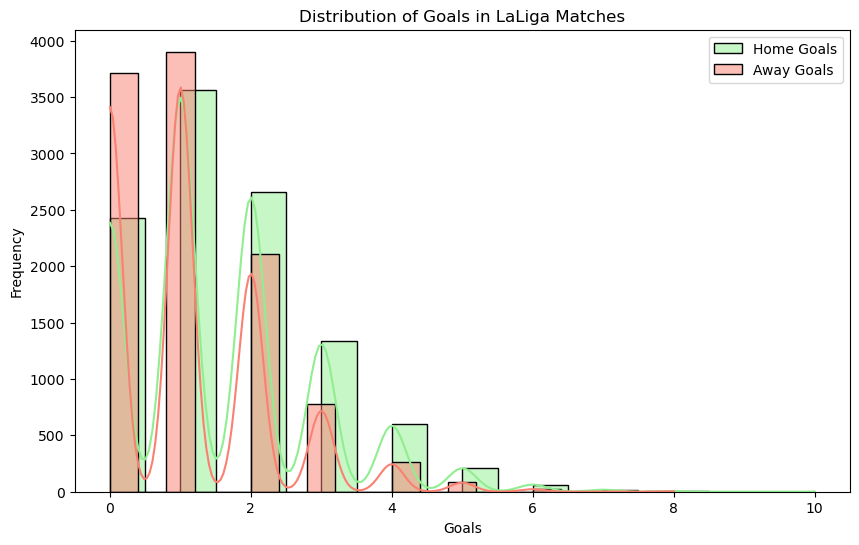

In [20]:
print("\nVisualization:")
# Example: Histogram for FTHG and FTAG
plt.figure(figsize=(10, 6))
sns.histplot(data=laliga_df, x='FTHG', bins=20, kde=True, color='lightgreen', label='Home Goals')
sns.histplot(data=laliga_df, x='FTAG', bins=20, kde=True, color='salmon', label='Away Goals')
plt.title('Distribution of Goals in LaLiga Matches')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Visualization:


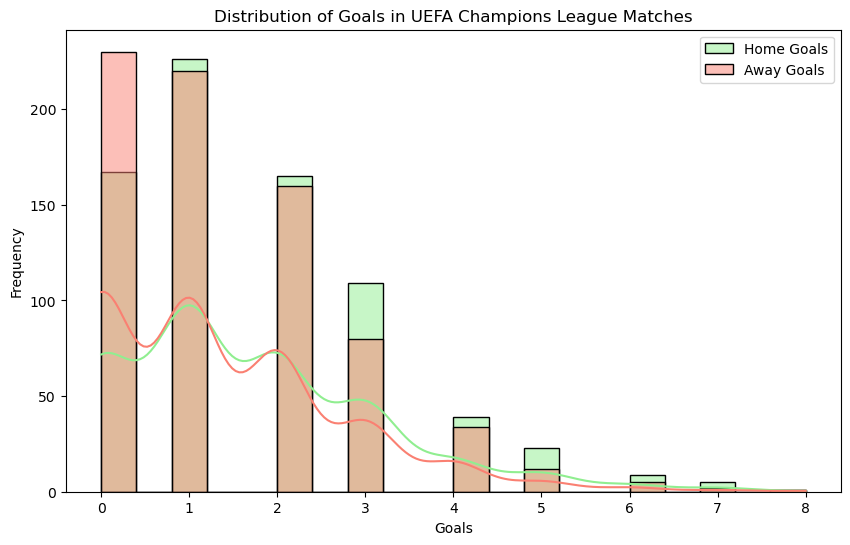

In [21]:
print("\nVisualization:")
# Example: Histogram for FTHG and FTAG
plt.figure(figsize=(10, 6))
sns.histplot(data=ucl_df, x='FTHG', bins=20, kde=True, color='lightgreen', label='Home Goals')
sns.histplot(data=ucl_df, x='FTAG', bins=20, kde=True, color='salmon', label='Away Goals')
plt.title('Distribution of Goals in UEFA Champions League Matches')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Visualization:


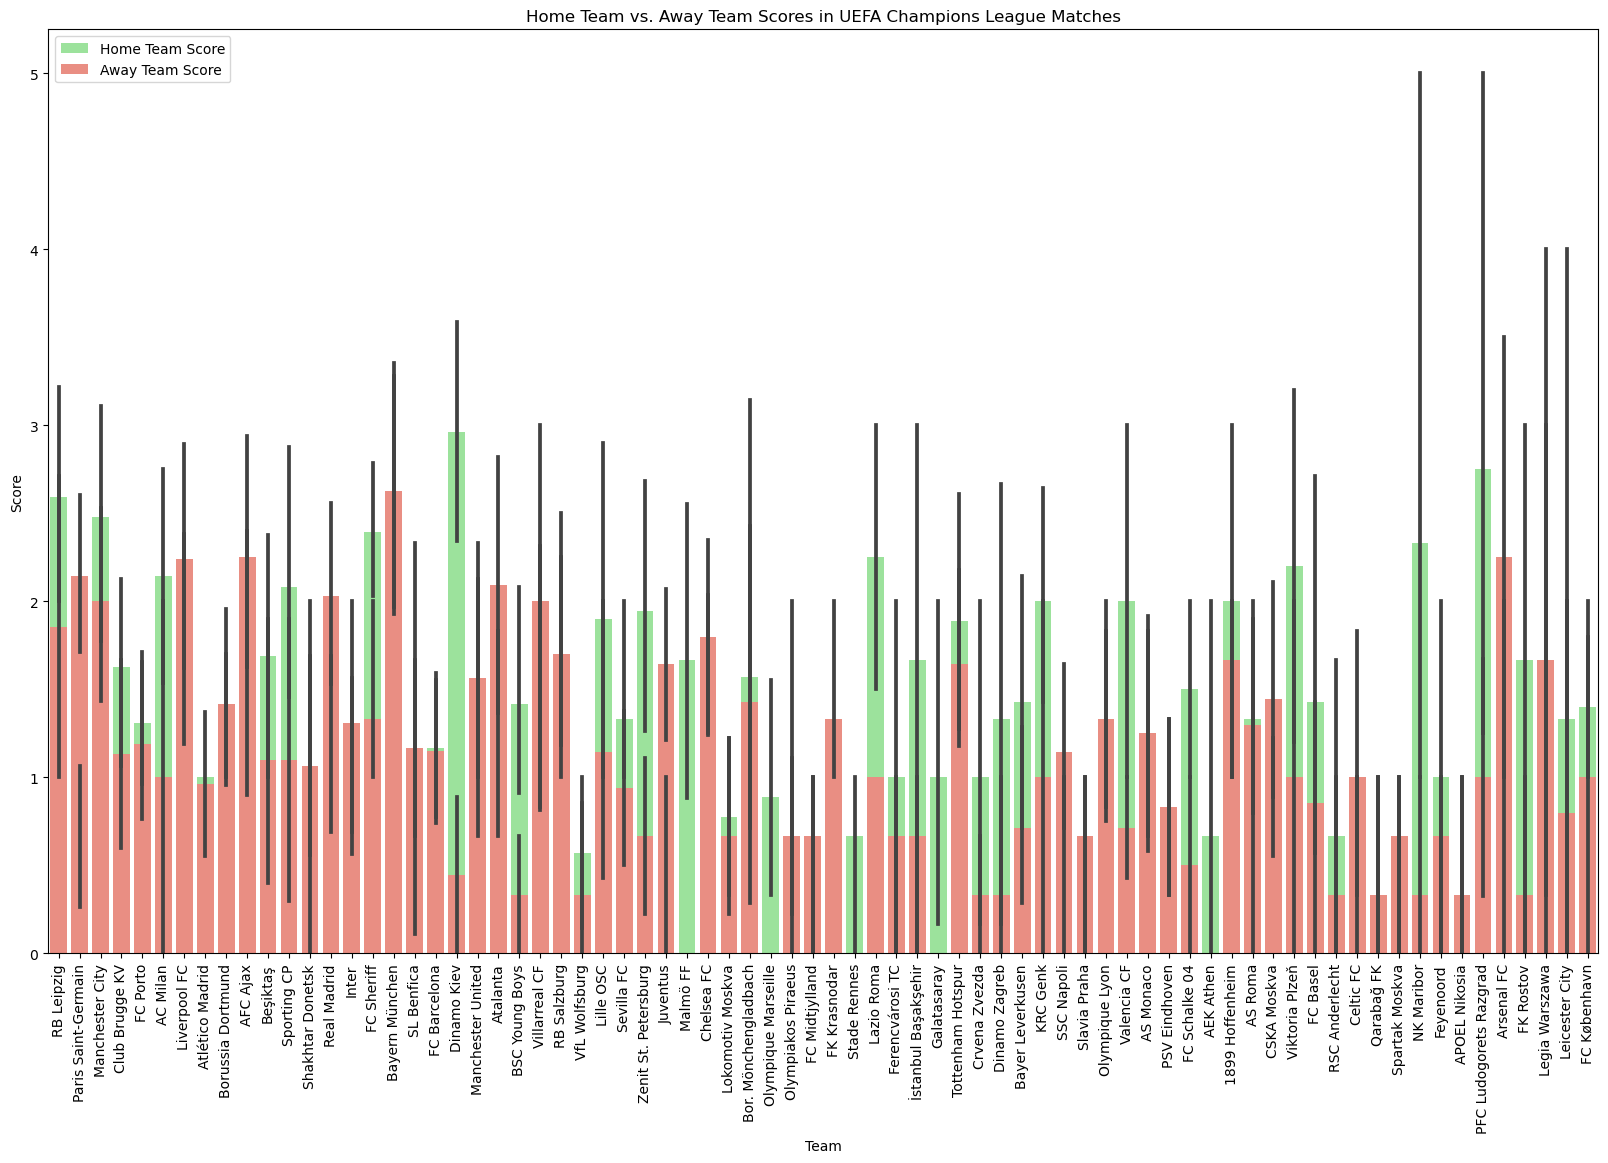

In [22]:
print("\nVisualization:")
# Example: Bar plot for Home Team vs. Away Team scores
plt.figure(figsize=(20, 12))
sns.barplot(data=ucl_df, x='HOME_TEAM', y='FTHG', color='lightgreen', label='Home Team Score')
sns.barplot(data=ucl_df, x='AWAY_TEAM', y='FTAG', color='salmon', label='Away Team Score')
plt.title('Home Team vs. Away Team Scores in UEFA Champions League Matches')
plt.xlabel('Team')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Obtaining data of interest
Our data of interest will be the home goals and away goals of each of the data frames so we do not need any further calculations to obtain these data since it is already shown in the data frames.

In [23]:
laliga_HG = laliga_df['FTHG']
laliga_AG = laliga_df['FTAG']

ucl_HG = ucl_df['FTHG']
ucl_AG = ucl_df['FTAG']

Two types of tests are performed:
   - First we perform a visual normality test, and a statistical one, using Kolmogorov-Smirnov test since we have a big dataset (otherwise Saphiro test would be used).
   - If the result is that we do not have normally distributed data, we use Wilcoxon test to determine wether there is a significant difference between both groups. Finally by looking at the result we know which one is higher.

#### Normality Test
- Normality test for La Liga home goals and away goals.


 Normality test for La Liga home goals


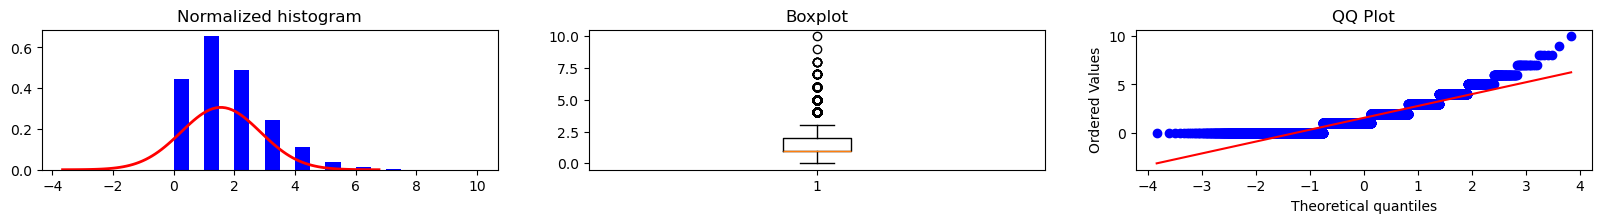

Kolmogorov-Smirnov statistic: 0.21466639630614143
p-value: 0.0
The data does not follow a normal distribution.

 Normality test for La Liga away goals


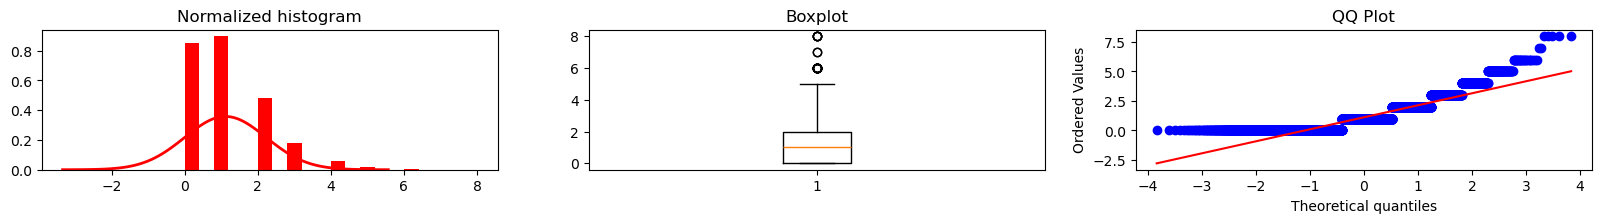

Kolmogorov-Smirnov statistic: 0.24124966330722292
p-value: 0.0
The data does not follow a normal distribution.


In [24]:
print("\n Normality test for La Liga home goals")
u.visual_normality_test(laliga_HG, 'blue', bins=20)
u.numerical_normality(laliga_HG)

print("\n Normality test for La Liga away goals")
u.visual_normality_test(laliga_AG, 'red', bins=20)
u.numerical_normality(laliga_AG)

- Normality test for UEFA Champions League home goals and away goals.

Normality test for UCL home goals


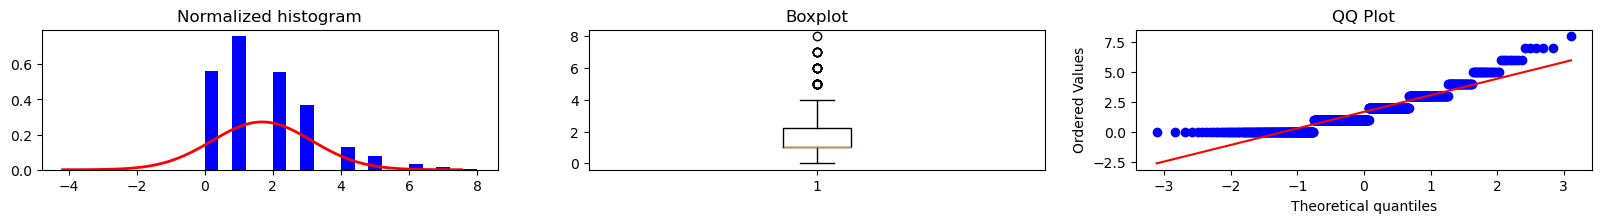

Kolmogorov-Smirnov statistic: 0.20727063076253444
p-value: 1.6392205835755786e-28
The data does not follow a normal distribution.

 Normality test for UCL away goals


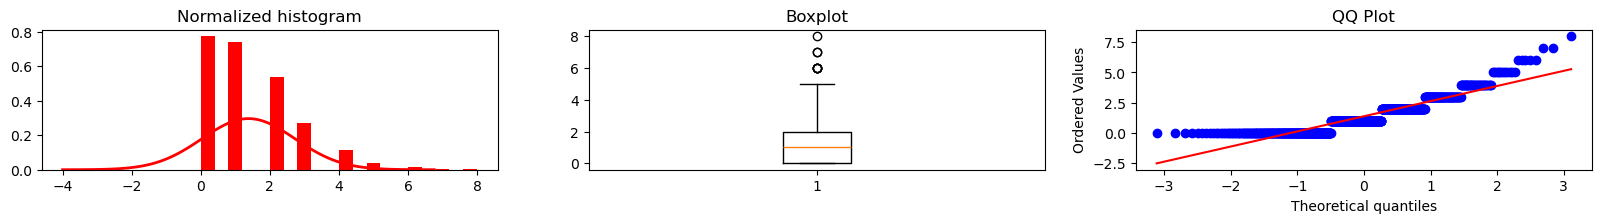

Kolmogorov-Smirnov statistic: 0.21649950758374137
p-value: 4.294816548339418e-31
The data does not follow a normal distribution.


In [25]:
print("Normality test for UCL home goals")
u.visual_normality_test(ucl_HG, 'blue', bins=20)
u.numerical_normality(ucl_HG)

print("\n Normality test for UCL away goals")
u.visual_normality_test(ucl_AG, 'red', bins=20)
u.numerical_normality(ucl_AG)

From these results we can observe that none of the distributions (home goals and away goals in both UCL and La Liga) follow a normal distribution.
Now we will perform a non parametric test to check for distribution differences.

#### Hypothesis testing

Now the hypothesis testing is stated, having:

- **Null Hypothesis (H0)**: There is no difference between goals scored at home games and away games.
- **Alternative Hypothesis (H1)**: There is a difference between goals scored at home games and away games.

$$H_0: μ_{\text{home}} = μ_{\text{away}} \quad\text{vs}\quad H_1: μ_{\text{home}} \neq μ_{\text{away}}$$

Which can also be written as:

$$H_0: μ = 0 \quad\text{vs}\quad H_1: μ \neq 0$$

Having,

$$μ = μ_{\text{home}} - μ_{\text{away}}$$

It is worth noting that μ represents the differences of both means, goals scored home ($μ_{\text{home}}$) and goals score away ($μ_{\text{away}}$).

First we will check for difference in the total distribution of goals through all the seasons we have data of. Finally we will be able to check each season individually.

##### Wilcoxon test

###### Total goals distribution in La Liga

There is a significant difference between the home goals and the away goals.
P-value: 8.584817120526911e-142 Wilcoxon test statistic: 11185402.0
Teams score more goals at home matches.


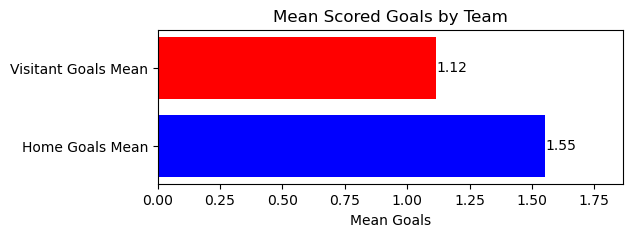

In [26]:
u.goals(laliga_df)

###### Total goals distribution in UCL

There is a significant difference between the home goals and the away goals.
P-value: 0.00010842894417092417 Wilcoxon test statistic: 70066.5
Teams score more goals at home matches.


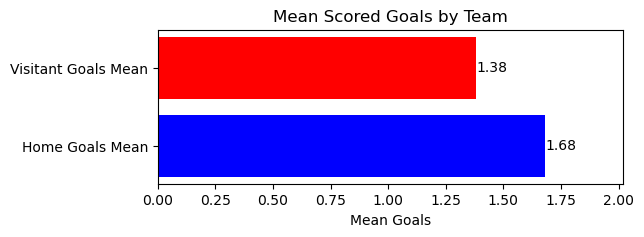

In [27]:
u.goals(ucl_df)

###### Goal distribution in La Liga by season

In [28]:
df = laliga_df

seasons = df[df['SEASON'] != '2023-24']['SEASON'].unique()

# Create the dropdown widget
season_selector = widgets.Dropdown(
    options=seasons,
    description='Season:'
)

season_lambda = lambda season_selected: u.season(df=df, season_selected=season_selected)

# Create the interaction between the widget and the plot function
widgets.interactive(
    season_lambda,
    season_selected=season_selector
)

interactive(children=(Dropdown(description='Season:', options=('1995-96', '1996-97', '1997-98', '1998-99', '19…

###### Goal distribution in UCL by season

In [29]:
df = ucl_df

seasons = df[df['SEASON'] != '2023-24']['SEASON'].unique()

# Create the dropdown widget
season_selector = widgets.Dropdown(
    options=seasons,
    description='Season:'
)

season_lambda = lambda season_selected: u.season(df=df, season_selected=season_selected)

# Create the interaction between the widget and the plot function
widgets.interactive(
    season_lambda,
    season_selected=season_selector
)

interactive(children=(Dropdown(description='Season:', options=('2021-2022', '2020-2021', '2019-2020', '2018-20…

#### Conclusion
It can be observed that for all cases except for the last 3 seasons of UCL, there is a significant difference between the number of goals scored at home and those scored away in favor of home goals. 

The fact that the last few years there is no significant difference in the UEFA Champions League games may respond to the abolishment of the double value rule for the away goals, which make teams be more aggressive in the entire knockouts instead of just in the return game.

### 2) Is there a relation between number of goals concede and points obtained? And between goals scored and points obtained?

In this case, the question aims to investigate if having a good defense is a synonim of winning games. For it, a linear regression method combined with inference of the slope (B1) and the intercept (B0) will be implemented. 

For this hyposthesis la liga matches database will be the only one implemented.

#### Obtaining data of interest

In [30]:
# Create a DataFrame to store the results by team and season
results = pd.DataFrame(columns=['Season', 'Team', 'Points', 'Goals_Difference', 'Goals_Scored', 'Goals_Conceded'])

# Get the unique seasons
seasons = laliga_df['SEASON'].unique()
seasons = seasons[:-1]

# Iterate over each season
for season in seasons:
    # Filter the data for the current season
    df_season = laliga_df[laliga_df['SEASON'] == season]
    
    # Get the unique teams for the season
    teams = pd.unique(df_season[['HOME_TEAM', 'AWAY_TEAM']].values.ravel('K'))
    
    # Iterate over each team
    for team in teams:
        # Calculate goals scored and conceded by the team at home
        home_games = df_season[df_season['HOME_TEAM'] == team]
        goals_scored_home = home_games['FTHG'].sum()
        goals_conceded_home = home_games['FTAG'].sum()
        
        # Calculate goals scored and conceded by the team away
        away_games = df_season[df_season['AWAY_TEAM'] == team]
        goals_scored_away = away_games['FTAG'].sum()
        goals_conceded_away = away_games['FTHG'].sum()
        
        # Calculate points obtained by the team
        points_home = sum(home_games['FTR'] == 'H') * 3 + sum(home_games['FTR'] == 'D') * 1
        points_away = sum(away_games['FTR'] == 'A') * 3 + sum(away_games['FTR'] == 'D') * 1
        
        # Total goals scored and conceded
        goals_scored = goals_scored_home + goals_scored_away
        goals_conceded = goals_conceded_home + goals_conceded_away
        points = points_home + points_away
        
        # Create a DataFrame for the current team's results
        team_results = pd.DataFrame([{
            'Season': season,
            'Team': team,
            'Points': points,
            'Goals_Difference': goals_scored-goals_conceded,
            'Goals_Scored': goals_scored,
            'Goals_Conceded': goals_conceded,
        }])
        
        # Concatenate the current team's results to the results DataFrame
        results = pd.concat([results, team_results], ignore_index=True)

#### EDA

In [31]:
# Create the dropdown widget
season_selector = widgets.Dropdown(
    options=seasons,
    description='Select Season:'
)

season_lambda = lambda season_selected: u.plot_classification(df=results, season_selected=season_selected)

# Create the interaction between the widget and the plot function
widgets.interactive(
    season_lambda, 
    season_selected=season_selector
)

interactive(children=(Dropdown(description='Select Season:', options=('1995-96', '1996-97', '1997-98', '1998-9…

#### Linear Regression Model

In [32]:
# Dependent variable: Points
y = results['Points']

##### Goals Conceded - Points

In [33]:
# Independent variable: Goals Conceded
x = results['Goals_Conceded']

r1, X = u.lrh(x,y)

# Extract the coefficients from the results
intercept, slope1 = r1.params 

# Print the regression results
print(f"Slope: {round(slope1,3)}")
print(f"Intercept: {round(intercept,3)}")

Slope: -0.967
Intercept: 102.022


In [34]:
print(r1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     675.7
Date:                Sat, 25 May 2024   Prob (F-statistic):           2.03e-98
Time:                        03:20:58   Log-Likelihood:                -2117.2
No. Observations:                 564   AIC:                             4238.
Df Residuals:                     562   BIC:                             4247.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            102.0222      1.952     52.

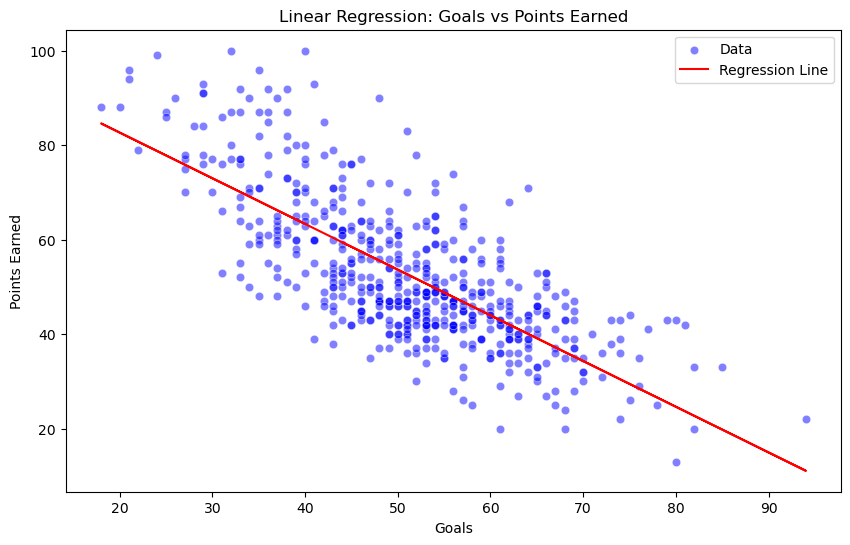

In [35]:
y_pred = u.plt_lrh(x, y)

In [36]:
# The correlation can also be computed
correlation = results[['Points', 'Goals_Conceded']].corr().iloc[0, 1]
print(f"Correlation (Pearson): {round(correlation,3)}")

Correlation (Pearson): -0.739


The previous result indicates a negative linear regression between both variables, the points and goals conceded.

The Goodness-of-fit of the model can be stimated by means of:
- The coefficient of determination, $R^2$, which measures the proportion of the variability in the dependent variable (points obtained) that is predictable or can be explained with the independent variable (goals concede in this case, or goals scored in the following one).
- The Residual Standard Error (RSE), which provides an average measure of how much the observed data points (points observed) deviate from the regression model's predicted values (predicted points). It represents the typical error or the average distance that the observed values fall from the regression line.

In [37]:
# Print regression metrics
print(f"R-squared: {round(r1.rsquared,3)}")

R-squared: 0.546


Interpreting $R^2$, approximately 54.6% of the variability in the points a team earns can be explained by the number of goals they concede. This suggests that as goals conceded increase, there is a corresponding and predictable change in the number of points earned, but less than half of the variability in points is explained by goals conceded alone.

In [38]:
# Calculate the residuals
residuals = y - y_pred

# Calculate the sum of squared residuals
rss = np.sum(residuals**2)

# Calculate the number of observations and the number of predictors (independent variables)
n = len(y)
p = X.shape[1] - 1  # Subtract 1 to exclude the constant

# Calculate the RSE
rse = np.sqrt(rss / (n - p - 1))

print("Residual Standard Error (RSE):", round(rse,3))

Residual Standard Error (RSE): 10.348


The RSE obtained suggests that when using the model to predict the points earned based on goals conceded, the predictions could typically be off by about 16.03 points, indicating the level of uncertainty or potential error made by the regression model.

##### Goals Scored - Points

In [39]:
# Independent variable: Goals Conceded
x = results['Goals_Scored']

r2, X = u.lrh(x,y)

# Extract the coefficients from the results
intercept, slope2 = r2.params 

# Print the regression results
print(f"Slope: {round(slope2,3)}")
print(f"Intercept: {round(intercept,3)}")

Slope: 0.813
Intercept: 11.022


In [40]:
print(r2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1644.
Date:                Sat, 25 May 2024   Prob (F-statistic):          5.28e-169
Time:                        03:20:59   Log-Likelihood:                -1954.3
No. Observations:                 564   AIC:                             3913.
Df Residuals:                     562   BIC:                             3921.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.0219      1.076     10.248   

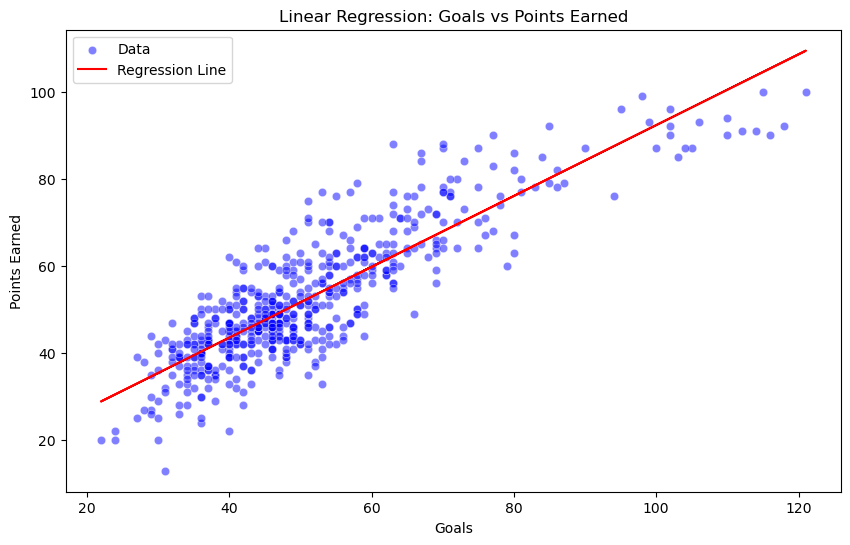

In [41]:
y_pred = u.plt_lrh(x, y)

In [42]:
# The correlation can also be computed
correlation = results[['Points', 'Goals_Scored']].corr().iloc[0, 1]
print(f"Correlation (Pearson): {round(correlation,3)}")

Correlation (Pearson): 0.863


The previous result indicates a positive linear regression between both variables, the points and goals scored.

As done before the Goodness-of-fit of the model can be stimated by means of the coefficient of determination, $R^2$, and the RSE.

In [43]:
# Print regression metrics
print(f"R-squared: {round(r2.rsquared,3)}")

R-squared: 0.745


In [44]:
# Calculate the residuals
residuals = y - y_pred

# Calculate the sum of squared residuals
rss = np.sum(residuals**2)

# Calculate the number of observations and the number of predictors (independent variables)
n = len(y)
p = X.shape[1] - 1  # Subtract 1 to exclude the constant

# Calculate the RSE
rse = np.sqrt(rss / (n - p - 1))

print("Residual Standard Error (RSE):", round(rse,3))

Residual Standard Error (RSE): 7.752


In this case, both, $R^2$ and RSE, improved, having:
- 74.5% of the variability in the points a team earns explained by the number of goals they score. This suggests that as goals scored increase, there is a corresponding and predictable change in the number of points earned.
- the predictions could typically be off by about 7.8 points, indicating the level of uncertainty or potential error decreased with this second model.

##### Goals Difference - Points

In [45]:
# Independent variable: Goals Conceded
x = results['Goals_Difference']

r3, X = u.lrh(x,y)

# Extract the coefficients from the results
intercept, slope3 = r3.params 

# Print the regression results
print(f"Slope: {round(slope3,3)}")
print(f"Intercept: {round(intercept,3)}")

Slope: 0.61
Intercept: 52.573


In [46]:
print(r3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     5257.
Date:                Sat, 25 May 2024   Prob (F-statistic):          2.04e-287
Time:                        03:20:59   Log-Likelihood:                -1680.8
No. Observations:                 564   AIC:                             3366.
Df Residuals:                     562   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               52.5727      0.201  

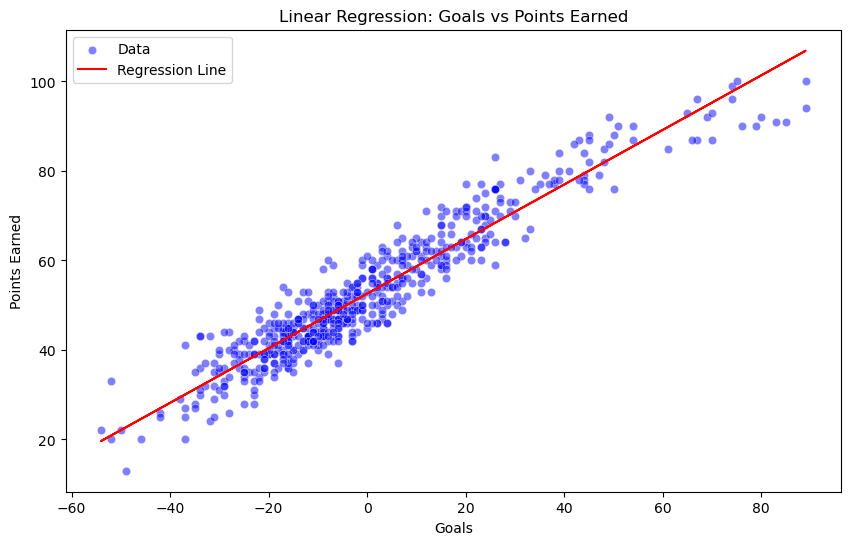

In [47]:
y_pred = u.plt_lrh(x, y)

In [48]:
# The correlation can also be computed
correlation = results[['Points', 'Goals_Difference']].corr().iloc[0, 1]
print(f"Correlation (Pearson): {round(correlation,3)}")

Correlation (Pearson): 0.95


The previous result indicates a positive linear regression between both variables, the points and goals difference.

As done before the Goodness-of-fit of the model can be stimated by means of the coefficient of determination, $R^2$, and the RSE.

In [49]:
# Print regression metrics
print(f"R-squared: {round(r3.rsquared,3)}")

R-squared: 0.903


In [50]:
# Calculate the residuals
residuals = y - y_pred

# Calculate the sum of squared residuals
rss = np.sum(residuals**2)

# Calculate the number of observations and the number of predictors (independent variables)
n = len(y)
p = X.shape[1] - 1  # Subtract 1 to exclude the constant

# Calculate the RSE
rse = np.sqrt(rss / (n - p - 1))

print("Residual Standard Error (RSE):", round(rse,3))

Residual Standard Error (RSE): 4.773


In this case, both, $R^2$ and RSE, improved even more, having:
- 90.3% of the variability in the points a team earns explained by the number of goals they score. This suggests that as goals scored increase, there is a corresponding and predictable change in the number of points earned.
- the predictions could typically be off by about 4.8 points, indicating the level of uncertainty or potential error decreased with this third model.

#### Hypothesis testing

- **Null Hypothesis (H0)**: There is no linear relation between the number of goals (concede, scored or difference) and the points obtained.
- **Alternative Hypothesis (H1)**: There is linear relation between the number of goals (concede, scored or difference) and the points obtained.

$$
H_0: \beta_{\text{1}} = 0 \quad \text{vs} \quad H_1: \beta_{\text{1}} \neq 0
$$

##### **Inference in simple linear regression: Paired t-test**

###### Goals Conceded - Points

In [51]:
# Get the p-value associated with the coefficient of the independent variable
t_value = slope1 / r1.bse[1]
p_value = r1.pvalues['Goals_Conceded']

# Set the significance level
alpha = 0.05

# Print the results
print("t-value:", round(t_value,3))
print("p-value:", p_value)

# Check the hypothesis
if p_value < alpha:
    print("Reject the null hypothesis. There is a linear relationship between the number of goals scored and the points obtained.")
else:
    print("Fail to reject the null hypothesis. There is no linear relationship between the number of goals scored and the points obtained.")

t-value: -25.995
p-value: 2.0270207423175708e-98
Reject the null hypothesis. There is a linear relationship between the number of goals scored and the points obtained.


###### Goals Scored - Points

In [52]:
# Get the p-value associated with the coefficient of the independent variable
t_value = slope2 / r2.bse[1]
p_value = r2.pvalues['Goals_Scored']

# Set the significance level
alpha = 0.05

# Print the results
print("t-value:", round(t_value,3))
print("p-value:", p_value)

# Check the hypothesis
if p_value < alpha:
    print("Reject the null hypothesis. There is a linear relationship between the number of goals scored and the points obtained.")
else:
    print("Fail to reject the null hypothesis. There is no linear relationship between the number of goals scored and the points obtained.")

t-value: 40.544
p-value: 5.2782259147991467e-169
Reject the null hypothesis. There is a linear relationship between the number of goals scored and the points obtained.


###### Goals Difference - Points

In [53]:
# Get the p-value associated with the coefficient of the independent variable
t_value = slope3 / r3.bse[1]
p_value = r3.pvalues['Goals_Difference']

# Set the significance level
alpha = 0.05

# Print the results
print("t-value:", round(t_value,3))
print("p-value:", p_value)

# Check the hypothesis
if p_value < alpha:
    print("Reject the null hypothesis. There is a linear relationship between the number of goals scored and the points obtained.")
else:
    print("Fail to reject the null hypothesis. There is no linear relationship between the number of goals scored and the points obtained.")

t-value: 72.503
p-value: 2.039767747395701e-287
Reject the null hypothesis. There is a linear relationship between the number of goals scored and the points obtained.


##### **Inference in simple linear regression: By season**

###### Goals Conceded - Points

In [54]:
# Create the dropdown widget
season_selector = widgets.Dropdown(
    options=seasons,
    description='Select Season:'
)

season_lambda = lambda season_selected: u.season_lr(df=results, season_selected=season_selected, goals='conceded')

# Create the interaction between the widget and the plot function
widgets.interactive(
    season_lambda, 
    season_selected=season_selector
)

interactive(children=(Dropdown(description='Select Season:', options=('1995-96', '1996-97', '1997-98', '1998-9…

###### Goals Scored - Points

In [55]:
# Create the dropdown widget
season_selector = widgets.Dropdown(
    options=seasons,
    description='Select Season:'
)

season_lambda = lambda season_selected: u.season_lr(df=results, season_selected=season_selected, goals='scored')

# Create the interaction between the widget and the plot function
widgets.interactive(
    season_lambda, 
    season_selected=season_selector
)

interactive(children=(Dropdown(description='Select Season:', options=('1995-96', '1996-97', '1997-98', '1998-9…

###### Goals Difference - Points

In [56]:
# Create the dropdown widget
season_selector = widgets.Dropdown(
    options=seasons,
    description='Select Season:'
)

season_lambda = lambda season_selected: u.season_lr(df=results, season_selected=season_selected, goals='difference')

# Create the interaction between the widget and the plot function
widgets.interactive(
    season_lambda, 
    season_selected=season_selector
)

interactive(children=(Dropdown(description='Select Season:', options=('1995-96', '1996-97', '1997-98', '1998-9…

#### Conclusion

Based on the analysis of the relationship between goals (conceded, scored, and their difference) and points obtained, several key findings emerge. Firstly, there exists a negative, but weak, linear relationship between goals conceded and points obtained. This suggests that as the number of goals conceded increases, the points obtained tend to decrease, but not strongly. Conversely, there is a positive linear relationship between goals scored and points obtained, which falls within the realm of moderate correlation. This implies that as the number of goals scored increases, so do the points obtained, showcasing the importance of offensive tactics in securing points. Moreover, the analysis reveals a particularly strong positive linear relationship between the difference in goals (goals scored minus goals conceded) and points obtained. This underscores the significance of goal differential as a determinant of success, with teams securing more points as they outscore their opponents by a greater margin.

In light of these results, it is evident that a balanced approach combining robustdy defense with a potent attack is pivotal for maximizing points. While a solid defensive strategy helps minimize goals conceded and maintain competitiveness, a formidable offensive front is equally crucial in securing goals and, consequently, points. Therefore, the perfect strategy for winning points lies in the integration of a robust defense with a potent attack, leveraging both aspects to achieve success on the field.

### 3) Is the national league performance affected by the european competition?

This research question aims to explore the potential influence of participation in the prestigious Champions League on teams' performances in their respective national leagues. This question is pertinent in the football community as it addresses the broader impact of competing in multiple competitions concurrently, including considerations of player fatigue, squad rotation, and psychological factors. Moreover, stakeholders such as club owners, sponsors, and fans are interested in understanding the trade-offs between domestic success and continental glory.

For this hypothesis both datasets are going to be used, using the filtered La Liga dataset in order for having coherence.


#### EDA

In [57]:
# Identify common teams
common_teams = set(laliga_df['HOME_TEAM']).intersection(set(ucl_df['HOME_TEAM']))

In [58]:
# Create a DataFrame to store the average results of each team
results_laliga = pd.DataFrame(columns=['Team', 'Win %', 'Draw %', 'Loss %'])
results_ucl = pd.DataFrame(columns=['Team', 'Win %', 'Draw %', 'Loss %'])

In [59]:
# Iterate over each team
for team in common_teams:
    # Get the years in which the team participated in both La Liga and UEFA Champions League
    common_years = set(laliga_df[laliga_df['HOME_TEAM'] == team]['DATE_TIME'].dt.year).intersection(set(ucl_df[ucl_df['HOME_TEAM'] == team]['DATE_TIME'].dt.year))
    
    # Calculate average percentages for each year
    average_liga_win_percentage = 0
    average_liga_draw_percentage = 0
    average_liga_loss_percentage = 0
    average_ucl_win_percentage = 0
    average_ucl_draw_percentage = 0
    average_ucl_loss_percentage = 0
    
    num_years = len(common_years)
    for year in common_years:
       # Calculate percentages for La Liga
        la_liga_win_percentage, la_liga_draw_percentage, la_liga_loss_percentage = u.calculator(laliga_df, team, year, percentages=True)
        average_liga_win_percentage += la_liga_win_percentage
        average_liga_draw_percentage += la_liga_draw_percentage
        average_liga_loss_percentage += la_liga_loss_percentage
        
        # Calculate percentages for UEFA Champions League
        ucl_win_percentage, ucl_draw_percentage, ucl_loss_percentage = u.calculator(ucl_df, team, year, percentages=True)
        average_ucl_win_percentage += ucl_win_percentage
        average_ucl_draw_percentage += ucl_draw_percentage
        average_ucl_loss_percentage += ucl_loss_percentage
    
    # Calculate average percentages
    average_liga_win_percentage /= num_years
    average_liga_draw_percentage /= num_years
    average_liga_loss_percentage /= num_years
    average_ucl_win_percentage /= num_years
    average_ucl_draw_percentage /= num_years
    average_ucl_loss_percentage /= num_years
    
    # Append the results to the DataFrame
    results_laliga = pd.concat([results_laliga, pd.DataFrame({'Team': [team], 'Win %': [average_liga_win_percentage], 'Draw %': [average_liga_draw_percentage], 'Loss %': [average_liga_loss_percentage]})], ignore_index=True)
    results_ucl = pd.concat([results_ucl, pd.DataFrame({'Team': [team], 'Win %': [average_ucl_win_percentage], 'Draw %': [average_ucl_draw_percentage], 'Loss %': [average_ucl_loss_percentage]})], ignore_index=True)

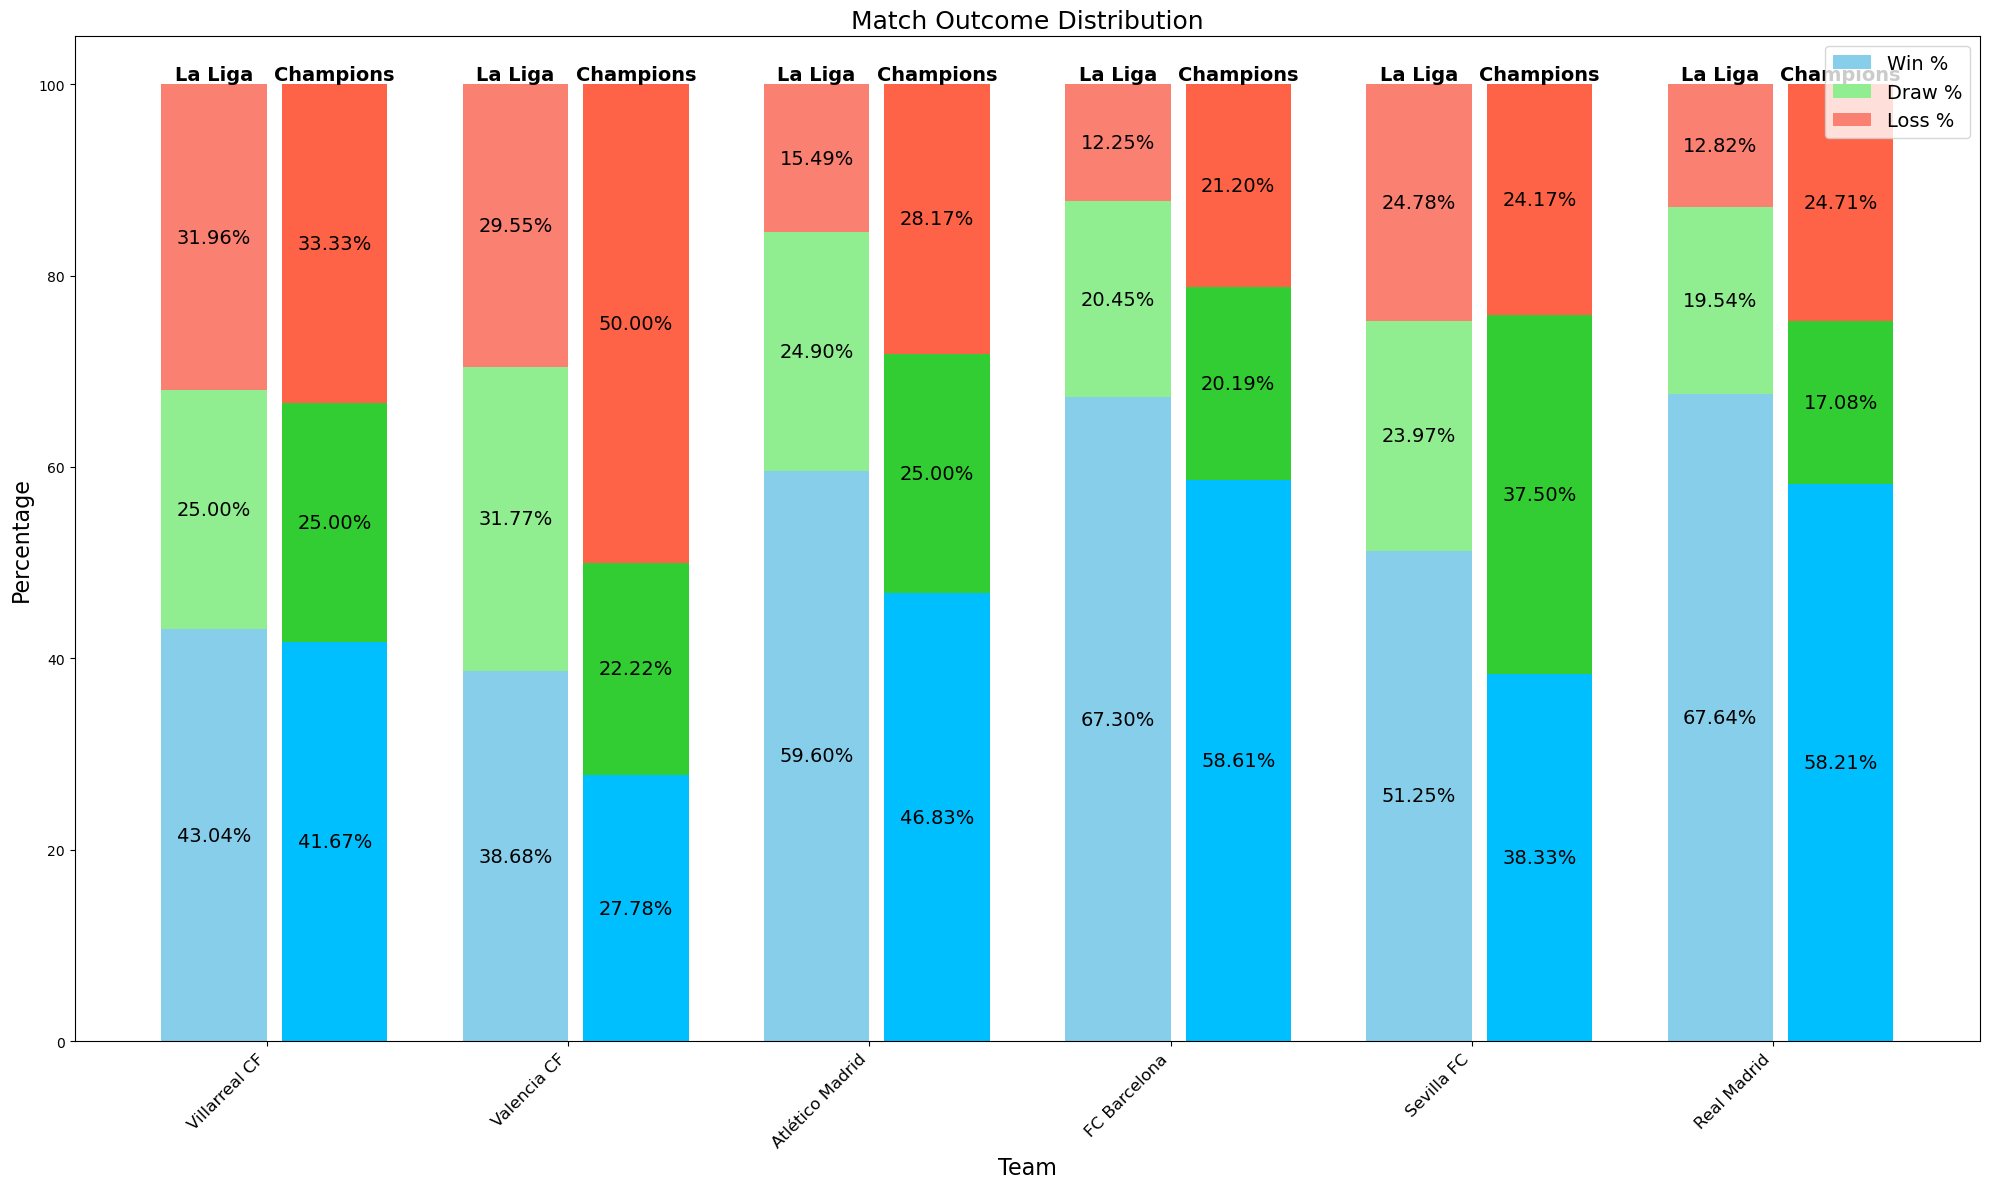

In [60]:
# Plot the results
plt.figure(figsize=(20, 12))
bar_width = 0.35
index = np.arange(len(results_laliga))

# Plot La Liga results
plt.bar(index, results_laliga['Win %'], color='skyblue', label='Win %', width=bar_width)
plt.bar(index, results_laliga['Draw %'], color='lightgreen', label='Draw %', width=bar_width, bottom=results_laliga['Win %'])
plt.bar(index, results_laliga['Loss %'], color='salmon', label='Loss %', width=bar_width, bottom=results_laliga['Win %'] + results_laliga['Draw %'])

# Plot UEFA Champions League results
plt.bar(index + bar_width + 0.05, results_ucl['Win %'], color='deepskyblue', width=bar_width)
plt.bar(index + bar_width + 0.05, results_ucl['Draw %'], color='limegreen', width=bar_width, bottom=results_ucl['Win %'])
plt.bar(index + bar_width + 0.05, results_ucl['Loss %'], color='tomato', width=bar_width, bottom=results_ucl['Win %'] + results_ucl['Draw %'])

# Add percentage labels on top of each bar for La Liga
for i, row in results_laliga.iterrows():
    plt.text(i, row['Win %'] / 2, f'{row["Win %"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i, row['Win %'] + row['Draw %'] / 2, f'{row["Draw %"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i, row['Win %'] + row['Draw %'] + row['Loss %'] / 2, f'{row["Loss %"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i, row['Win %'] + row['Draw %'] + row['Loss %'] + 1, 'La Liga', ha='center', va='center', color='black', fontsize=14, fontweight='bold')

# Add percentage labels on top of each bar for UEFA Champions League
for i, row in results_ucl.iterrows():
    plt.text(i + bar_width + 0.05, row['Win %'] / 2, f'{row["Win %"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i + bar_width + 0.05, row['Win %'] + row['Draw %'] / 2, f'{row["Draw %"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i + bar_width + 0.05, row['Win %'] + row['Draw %'] + row['Loss %'] / 2, f'{row["Loss %"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i + bar_width + 0.05, row['Win %'] + row['Draw %'] + row['Loss %'] + 1, 'Champions', ha='center', va='center', color='black', fontsize=14, fontweight='bold')

# Adjust x-axis ticks and labels
plt.xlabel('Team', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title('Match Outcome Distribution', fontsize=18)
plt.xticks(index + bar_width / 2, results_laliga['Team'], rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [61]:
# Calculate the average points for each team in both competitions
average_points_la_liga = {}
average_points_ucl = {}
for team in common_teams:
    # Get the years in which the team participated in both La Liga and UEFA Champions League
    common_years = set(laliga_df[laliga_df['HOME_TEAM'] == team]['DATE_TIME'].dt.year).intersection(set(ucl_df[ucl_df['HOME_TEAM'] == team]['DATE_TIME'].dt.year))
    
    points_list_la_liga = []
    points_list_ucl = []
    for year in common_years:
        # Calculate points for La Liga
        points_laliga = u.calculator(laliga_df, team, year, points=True)
        points_list_la_liga.append(points_laliga)
        
        # Calculate points for UEFA Champions League
        points_ucl = u.calculator(ucl_df, team, year, points=True)
        points_list_ucl.append(points_ucl)
    
    # Calculate average points for the team in La Liga
    average_points_la_liga[team] = sum(points_list_la_liga) / len(common_years)
    
    # Calculate average points for the team in UEFA Champions League
    average_points_ucl[team] = sum(points_list_ucl) / len(common_years)

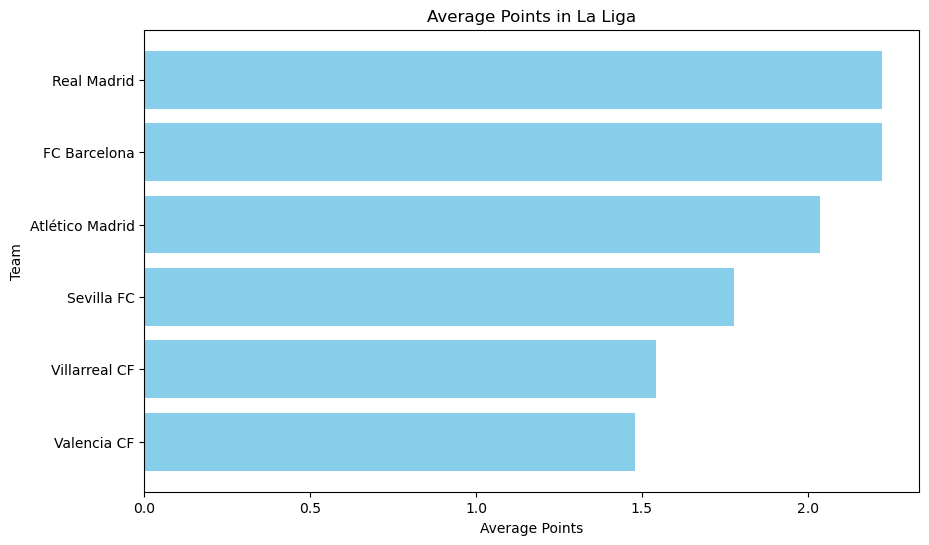

In [62]:
# Sorting the teams by the point means in La Liga from higher to lower
sorted_average_points_la_liga = dict(sorted(average_points_la_liga.items(), key=lambda item: item[1], reverse=True))
teams_la_liga = list(sorted_average_points_la_liga.keys())
points_la_liga = list(sorted_average_points_la_liga.values())

# Crear la gráfica de barras para La Liga
plt.figure(figsize=(10, 6))
plt.barh(teams_la_liga, points_la_liga, color='skyblue')
plt.xlabel('Average Points')
plt.ylabel('Team')
plt.title('Average Points in La Liga')
plt.gca().invert_yaxis()  # Invertir el eje y para que el equipo con más puntos esté arriba
plt.show()

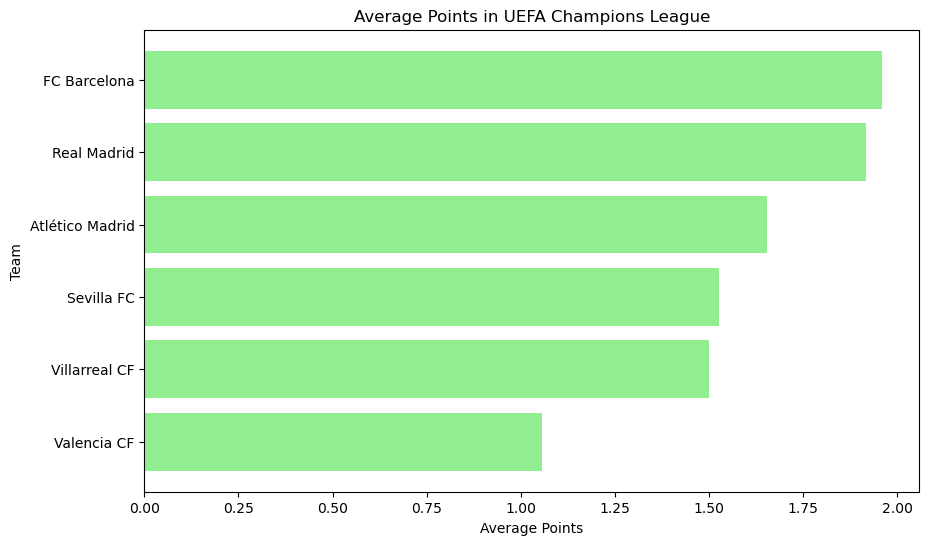

In [63]:
# Sorting the teams by the point means in Champions League from higher to lower
sorted_average_points_ucl = dict(sorted(average_points_ucl.items(), key=lambda item: item[1], reverse=True))
teams_ucl = list(sorted_average_points_ucl.keys())
points_ucl = list(sorted_average_points_ucl.values())

# Crear la gráfica de barras para la UEFA Champions League
plt.figure(figsize=(10, 6))
plt.barh(teams_ucl, points_ucl, color='lightgreen')
plt.xlabel('Average Points')
plt.ylabel('Team')
plt.title('Average Points in UEFA Champions League')
plt.gca().invert_yaxis()  # Invertir el eje y para que el equipo con más puntos esté arriba
plt.show()

#### Obtaining data of interest

In [64]:
# 1. Sort both DataFrames by date
f_laliga_df = f_laliga_df.sort_values(by='DATE_TIME')
ucl_df = ucl_df.sort_values(by='DATE_TIME')

# 2. Create a list of dates for UCL matches
ucl_dates = ucl_df['DATE_TIME'].tolist()

# 3. Iterate through La Liga matches and check if there is a UCL match between La Liga matches
ucl_weeks = []
for idx, row in f_laliga_df.iterrows():
    current_date = row['DATE_TIME']
    #print(current_date)
    # Check if there is a UCL match between La Liga matches
    if any(current_date < date for date in ucl_dates):
        ucl_weeks.append(1)  # Indicate there are UCL matches in this week
    else:
        ucl_weeks.append(0)  # Indicate there are no UCL matches in this week

# 4. Create a new column in the La Liga DataFrame to indicate if there are UCL matches in each week
f_laliga_df['UCL_match'] = ucl_weeks

# 5. Get a list of teams that have participated in both competitions
common_teams = set(f_laliga_df['HOME_TEAM']).intersection(set(ucl_df['HOME_TEAM']))

# 6. Filter La Liga and UCL matches to include only those of common teams
laliga_with_common_teams = f_laliga_df[(f_laliga_df['HOME_TEAM'].isin(common_teams)) | (f_laliga_df['AWAY_TEAM'].isin(common_teams))]
ucl_with_common_teams = ucl_df[(ucl_df['HOME_TEAM'].isin(common_teams)) | (ucl_df['AWAY_TEAM'].isin(common_teams))]

# 7. Split La Liga data into weeks with and without UCL matches
laliga_with_ucl = laliga_with_common_teams[laliga_with_common_teams['UCL_match'] == 1]
laliga_without_ucl = laliga_with_common_teams[laliga_with_common_teams['UCL_match'] == 0]

In [65]:
laliga_with_ucl

,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,FTHG,FTAG,FTR,HTHG,HTAG,HTR,UCL_match
8146,2016-17,2016-08-20,FC Barcelona,Betis,6,2,H,3,1,H,1
8147,2016-17,2016-08-20,Granada,Villarreal CF,1,1,D,0,0,D,1
8148,2016-17,2016-08-20,Sevilla FC,Espanol,6,4,H,3,3,D,1
8149,2016-17,2016-08-21,Atlético Madrid,Alaves,1,1,D,0,0,D,1
8150,2016-17,2016-08-21,Sociedad,Real Madrid,0,3,A,0,2,A,1
...,...,...,...,...,...,...,...,...,...,...,...
10414,2021-22,2022-05-20,Real Madrid,Betis,0,0,D,0,0,D,1
10416,2021-22,2022-05-21,Valencia CF,Celta,2,0,H,1,0,H,1
10421,2021-22,2022-05-22,FC Barcelona,Villarreal CF,0,2,A,0,1,A,1
10422,2021-22,2022-05-22,Sevilla FC,Ath Bilbao,1,0,H,0,0,D,1


In [66]:
laliga_without_ucl

,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,FTHG,FTAG,FTR,HTHG,HTAG,HTR,UCL_match
10424,2022-23,2022-08-12,Osasuna,Sevilla FC,2,1,H,1,1,D,0
10426,2022-23,2022-08-13,Valladolid,Villarreal CF,0,3,A,0,0,D,0
10427,2022-23,2022-08-13,FC Barcelona,Vallecano,0,0,D,0,0,D,0
10430,2022-23,2022-08-14,Almeria,Real Madrid,1,2,A,1,0,H,0
10429,2022-23,2022-08-14,Valencia CF,Girona,1,0,H,1,0,H,0
...,...,...,...,...,...,...,...,...,...,...,...
10799,2022-23,2023-06-04,Betis,Valencia CF,1,1,D,1,0,H,0
10800,2022-23,2023-06-04,Celta,FC Barcelona,2,1,H,1,0,H,0
10798,2022-23,2023-06-04,Villarreal CF,Atlético Madrid,2,2,D,1,1,D,0
10796,2022-23,2023-06-04,Real Madrid,Ath Bilbao,1,1,D,0,0,D,0


In [67]:
# Initialize an empty list to store individual team results DataFrames
team_results = []

# Iterate over common_teams and calculate results for each team
for team in common_teams:
    # Get the years in which the team participated in both La Liga with UCL and La Liga without UCL
    ucl_years = set(laliga_with_ucl[laliga_with_ucl['HOME_TEAM'] == team]['DATE_TIME'].dt.year)
    
    # Calculate the average percentages for La Liga with UCL
    liga_with_ucl_win_percentage, liga_with_ucl_draw_percentage, liga_with_ucl_loss_percentage = u.calculator(laliga_with_ucl, team, ucl_years, percentages=True)
    
    # Calculate the average percentages for La Liga without UCL
    liga_without_ucl_win_percentage, liga_without_ucl_draw_percentage, liga_without_ucl_loss_percentage = u.calculator(laliga_without_ucl, team, ucl_years, percentages=True)
    
    # Create a DataFrame for the current team's results
    team_df = pd.DataFrame({'Team': [team],
                            'Win % with UCL': [liga_with_ucl_win_percentage],
                            'Draw % with UCL': [liga_with_ucl_draw_percentage],
                            'Loss % with UCL': [liga_with_ucl_loss_percentage],
                            'Win % without UCL': [liga_without_ucl_win_percentage],
                            'Draw % without UCL': [liga_without_ucl_draw_percentage],
                            'Loss % without UCL': [liga_without_ucl_loss_percentage]})
    
    # Append the team DataFrame to the list
    team_results.append(team_df)

# Concatenate all individual team results DataFrames into a single DataFrame
all_teams_results = pd.concat(team_results, ignore_index=True)

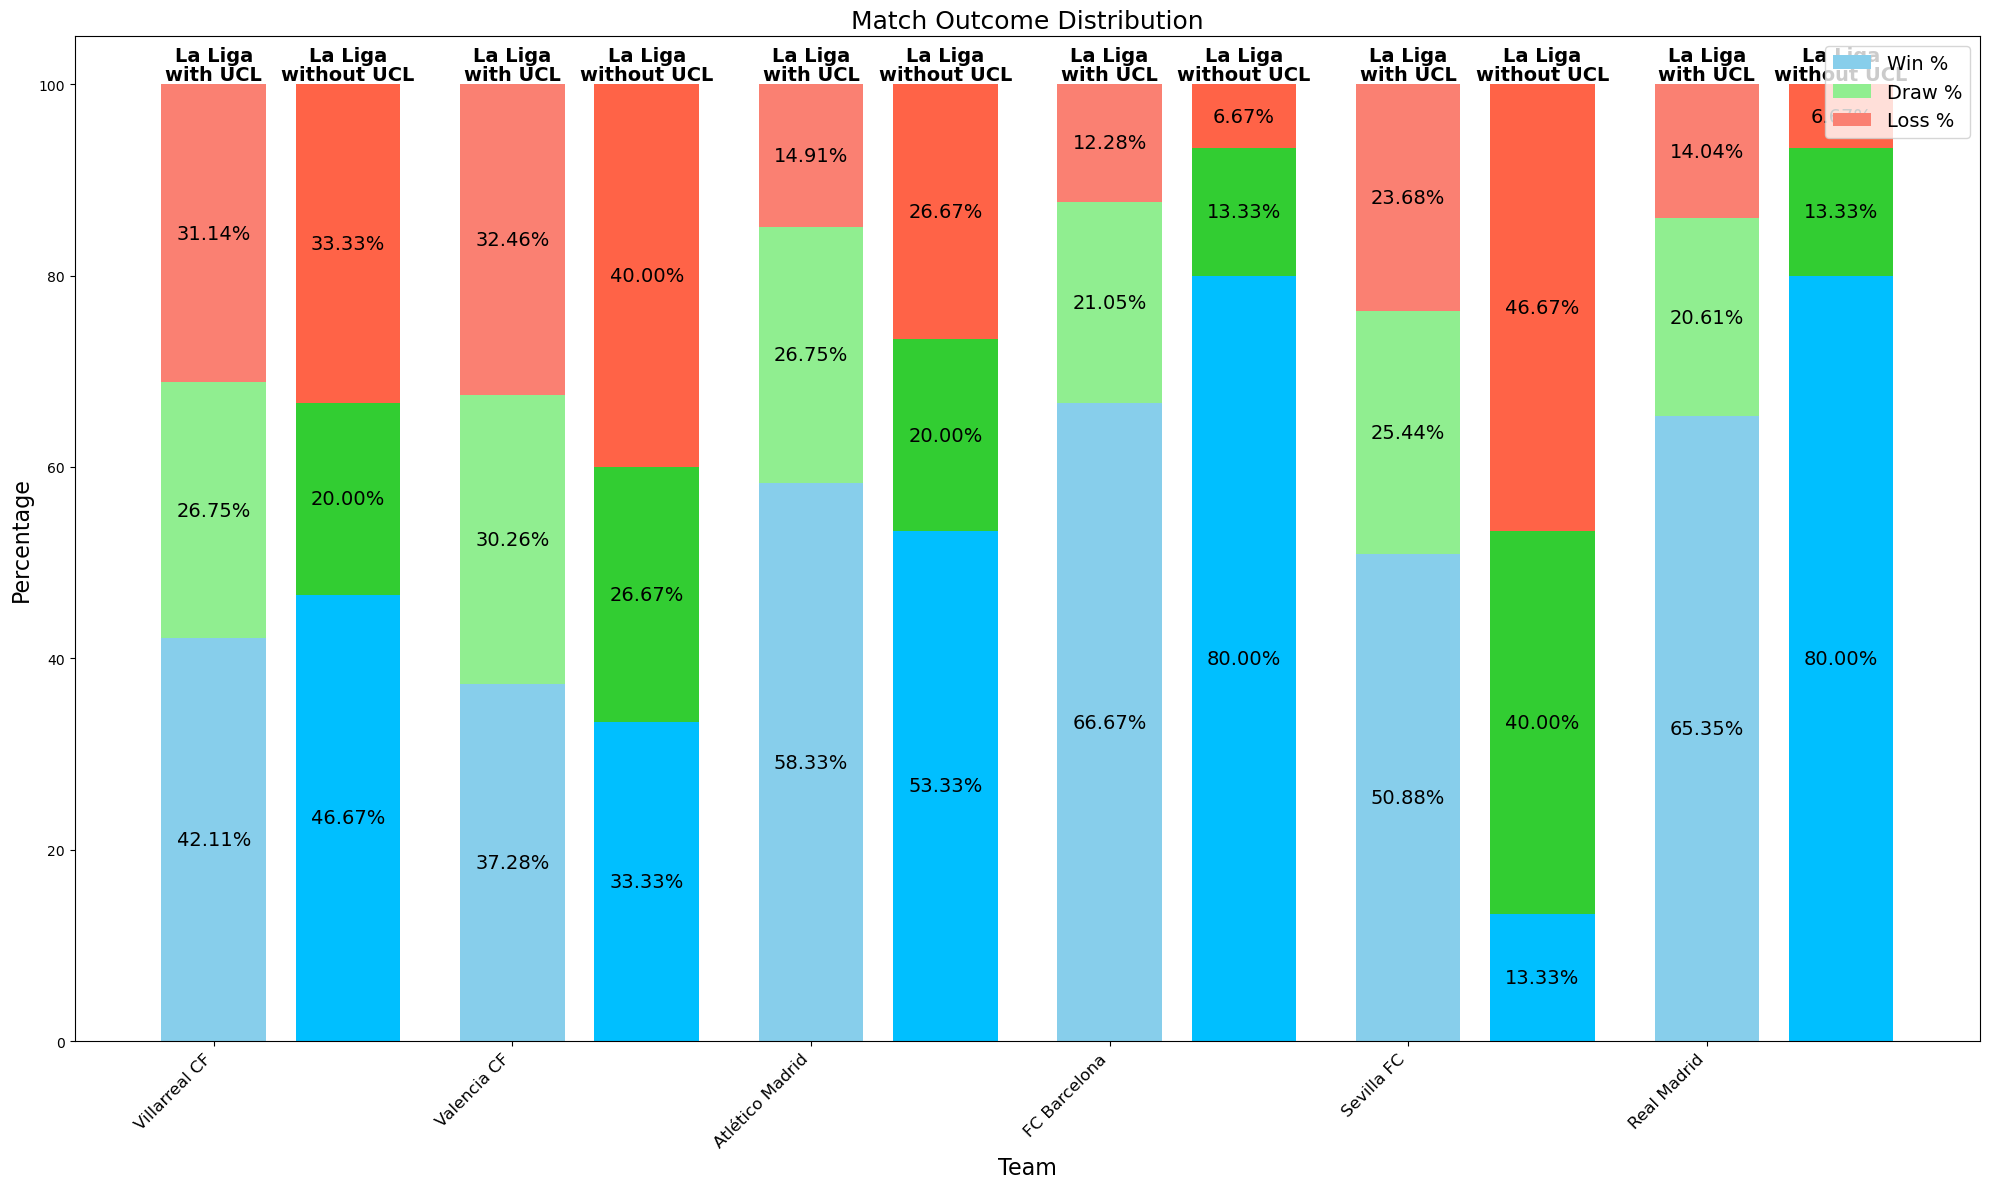

In [68]:
# Plot the results
plt.figure(figsize=(20, 12))
bar_width = 0.35
index = np.arange(len(all_teams_results))

# Plot La Liga results with UCL
plt.bar(index, all_teams_results['Win % with UCL'], color='skyblue', label='Win %', width=bar_width)
plt.bar(index, all_teams_results['Draw % with UCL'], color='lightgreen', label='Draw %', width=bar_width, bottom=all_teams_results['Win % with UCL'])
plt.bar(index, all_teams_results['Loss % with UCL'], color='salmon', label='Loss %', width=bar_width, bottom=all_teams_results['Win % with UCL'] + all_teams_results['Draw % with UCL'])

# Plot La Liga results without UCL
plt.bar(index + bar_width + 0.1, all_teams_results['Win % without UCL'], color='deepskyblue', width=bar_width)
plt.bar(index + bar_width + 0.1, all_teams_results['Draw % without UCL'], color='limegreen', width=bar_width, bottom=all_teams_results['Win % without UCL'])
plt.bar(index + bar_width + 0.1, all_teams_results['Loss % without UCL'], color='tomato', width=bar_width, bottom=all_teams_results['Win % without UCL'] + all_teams_results['Draw % without UCL'])

# Add percentage labels on top of each bar for La Liga with UCL
for i, row in all_teams_results.iterrows():
    plt.text(i, row['Win % with UCL'] / 2, f'{row["Win % with UCL"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i, row['Win % with UCL'] + row['Draw % with UCL'] / 2, f'{row["Draw % with UCL"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i, row['Win % with UCL'] + row['Draw % with UCL'] + row['Loss % with UCL'] / 2, f'{row["Loss % with UCL"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i, row['Win % with UCL'] + row['Draw % with UCL'] + row['Loss % with UCL'] + 1, 'with UCL', ha='center', va='center', color='black', fontsize=14, fontweight='bold')
    plt.text(i, row['Win % with UCL'] + row['Draw % with UCL'] + row['Loss % with UCL'] + 3, 'La Liga', ha='center', va='center', color='black', fontsize=14, fontweight='bold')

# Add percentage labels on top of each bar for La Liga without UCL
for i, row in all_teams_results.iterrows():
    plt.text(i + bar_width + 0.1, row['Win % without UCL'] / 2, f'{row["Win % without UCL"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i + bar_width + 0.1, row['Win % without UCL'] + row['Draw % without UCL'] / 2, f'{row["Draw % without UCL"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i + bar_width + 0.1, row['Win % without UCL'] + row['Draw % without UCL'] + row['Loss % without UCL'] / 2, f'{row["Loss % without UCL"]:.2f}%', ha='center', va='center', color='black', fontsize=14)
    plt.text(i + bar_width + 0.1, row['Win % without UCL'] + row['Draw % without UCL'] + row['Loss % without UCL'] + 1, 'without UCL', ha='center', va='center', color='black', fontsize=14, fontweight='bold')
    plt.text(i + bar_width + 0.1, row['Win % without UCL'] + row['Draw % without UCL'] + row['Loss % without UCL'] + 3, 'La Liga', ha='center', va='center', color='black', fontsize=14, fontweight='bold')


# Adjust x-axis ticks and labels
plt.xlabel('Team', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title('Match Outcome Distribution', fontsize=18)
plt.xticks(index, all_teams_results['Team'], rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

In [69]:
# Plot the bar graphs for each common team
for team in common_teams:
    # Get the years in which the team participated in both La Liga with UCL and La Liga without UCL
    ucl_years = set(laliga_with_ucl[laliga_with_ucl['HOME_TEAM'] == team]['DATE_TIME'].dt.year)
    
    # Calculate the average points for La Liga with UCL
    liga_with_ucl_average_points = u.calculator(laliga_with_ucl, team, ucl_years, points=True)
    
    # Calculate the average points for La Liga without UCL
    liga_without_ucl_average_points = u.calculator(laliga_without_ucl, team, ucl_years, points=True)
    
    print(f'{team}: Average Points (with UCL): {liga_with_ucl_average_points:.2f}, Average Points (without UCL): {liga_without_ucl_average_points:.2f}')

Villarreal CF: Average Points (with UCL): 1.53, Average Points (without UCL): 1.60
Valencia CF: Average Points (with UCL): 1.42, Average Points (without UCL): 1.27
Atlético Madrid: Average Points (with UCL): 2.02, Average Points (without UCL): 1.80
FC Barcelona: Average Points (with UCL): 2.21, Average Points (without UCL): 2.53
Sevilla FC: Average Points (with UCL): 1.78, Average Points (without UCL): 0.80
Real Madrid: Average Points (with UCL): 2.17, Average Points (without UCL): 2.53


#### Normality Test

In [70]:
# Example data
teams = list(average_points_la_liga.keys())  # Use the teams from your data
laliga_win_rate = np.array(list(average_points_la_liga.values()))  # Normal win rates in La Liga according to points
ucl_win_rate = np.array(list(average_points_ucl.values()))  # Win rates in La Liga with UCL matches according to points

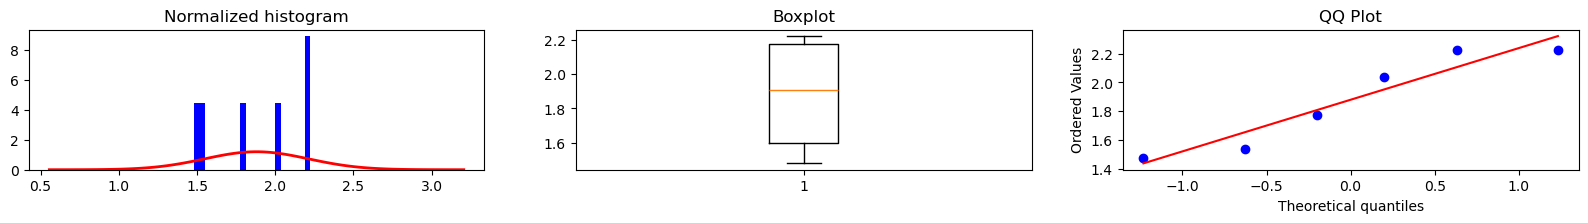

Shapiro-Wilk Statistic: 0.8794198036193848
p-value: 0.2664034366607666
The data follows a normal distribution.


In [71]:
# For La Liga
u.visual_normality_test(laliga_win_rate, 'blue')
u.numerical_normality(laliga_win_rate)

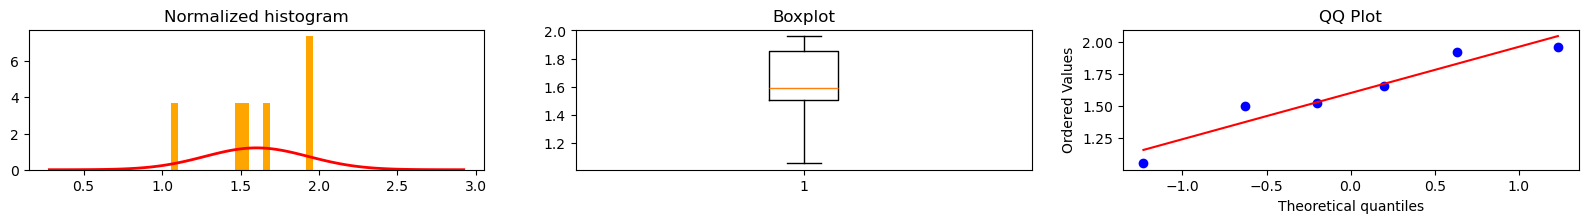

Shapiro-Wilk Statistic: 0.9249433279037476
p-value: 0.5416554808616638
The data follows a normal distribution.


In [72]:
# For Champions League
u.visual_normality_test(ucl_win_rate, 'orange')
u.numerical_normality(ucl_win_rate)

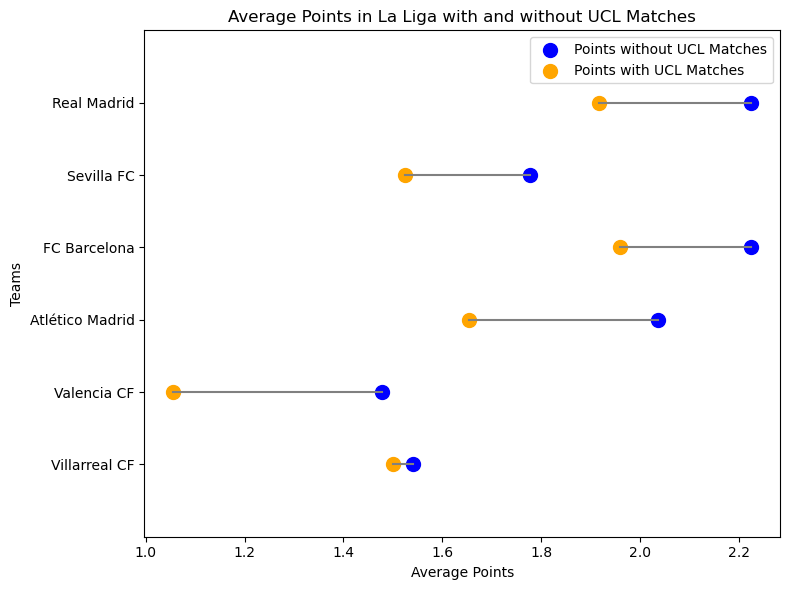

In [73]:
# Set figure size
fig, ax = plt.subplots(figsize=(8, 6))

# Set y-axis limits
ax.set_ylim(-1, len(teams))

# Plot lollipop markers for normal points
ax.scatter(laliga_win_rate, range(len(teams)), color='blue', marker='o', s=100, label='Points without UCL Matches')

# Plot lollipop markers for points with UCL matches
ax.scatter(ucl_win_rate, range(len(teams)), color='orange', marker='o', s=100, label='Points with UCL Matches')

# Plot lines connecting normal and UCL points
for i in range(len(teams)):
    ax.plot([laliga_win_rate[i], ucl_win_rate[i]], [i, i], color='gray')

# Set y-axis tick labels
ax.set_yticks(range(len(teams)))
ax.set_yticklabels(teams)

# Set labels and title
ax.set_xlabel('Average Points')
ax.set_ylabel('Teams')
ax.set_title('Average Points in La Liga with and without UCL Matches')

# Set legend
ax.legend()

# Adjust layout
plt.tight_layout()

# Show the graph
plt.show()

#### Hypothesis testing

- **Null Hypothesis (H0)**: There is no significant difference in the performance of teams in weeks with and without UCL matches in La Liga.
- **Alternative Hypothesis (H1)**: There is a significant difference in the performance of teams in weeks with and without UCL matches in La Liga.

$$H_0: \mu_{\text{w\_ucl}} = \mu_{\text{wo\_ucl}} \quad\text{vs}\quad H_1: \mu_{\text{w\_ucl}} \neq \mu_{\text{wo\_ucl}}$$

Which can also be written as:

$$H_0: \mu = 0 \quad\text{vs}\quad H_1: \mu \neq 0$$

Having,

$$\mu = \mu_{\text{liga}} - \mu_{\text{ucl}}$$

It is worth noting that μ represents the difference of both means, goals scored home ($\mu_{\text{liga}}$) and goals scored away ($\mu_{\text{wo\_ucl}}$). Also,
- $\mu_{\text{w\_ucl}}$: Mean of points gained with UCL between national matches.
- $\mu_{\text{wo\_ucl}}$: Mean of points gained without UCL between na*Paired t-test**.

##### **Paired t-test**

In [74]:
# Compute the paired t-test
t_statistic, p_value = ttest_rel(laliga_win_rate, ucl_win_rate)

# Define significance level
alpha = 0.05

# Print the results
print("Paired t-test Results:")
print(f"t-Statistic: {t_statistic}")
print(f"p-Value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in the performance of La Liga teams with and without UCL matches.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in the performance of La Liga teams with and without UCL matches.")


Paired t-test Results:
t-Statistic: 5.0876066988575674
p-Value: 0.003809843031422571
Reject the null hypothesis. There is a statistically significant difference in the performance of La Liga teams with and without UCL matches.


#### Conclusion

Based on the rejection of the null hypothesis, which posed no significant difference in the performance of La Liga teams with and without UEFA Champions League matches, it is concluded that there is indeed a statistically significant impact regarding the participation in the European competition on the performance of national league teams. This suggests that competing in the UCL influences the performance dynamics within the domestic league, potentially affecting factors such as team form, player fitness and physique, and tactical strategies. Such findings underscore the interconnexion of domestic and international football competitions and highlight the importance of considering the broader context when analyzing team performances. Further exploration into the specific mechanisms through which UCL participation influences national league performance could yield valuable insights for teams, coaches, and stakeholders navigating the complexities of modern football competition.

### 4) Real Madrid and comebacks

The research question delves into the phenomenon of Real Madrid's propensity for comebacks in matches, fostering debates about the role of luck versus team attributes such as resilience and strategic prowess. This question holds significance in the football world due to the enduring legacy of Real Madrid as a powerhouse club, coupled with their remarkable ability to overturn deficits and secure victories. The debate surrounding whether these comebacks are a product of chance or deep-rooted in the club's DNA fuels interest among fans, analysts, and rivals alike, shaping perceptions of the team's playing style and competitive spirit.

#### EDA - La Liga

In [75]:
# Count the number of matches Real Madrid played per season
matches_per_team = []
for season, season_data in laliga_df.groupby('SEASON'):
    home_matches = season_data['HOME_TEAM'].value_counts()
    away_matches = season_data['AWAY_TEAM'].value_counts()
    total_matches = home_matches.add(away_matches, fill_value=0)
    matches_per_team.extend([[season, team, matches] for team, matches in total_matches.items()])

# Create a DataFrame with the results
matches_per_team_df = pd.DataFrame(matches_per_team, columns=['Season', 'Team', 'Matches'])

# Sort the DataFrame by season and then by team name
matches_per_team_df.sort_values(by=['Season', 'Team'], inplace=True)

# Reset index after sorting
matches_per_team_df.reset_index(drop=True, inplace=True)

# Print the DataFrame
matches_RM = matches_per_team_df[matches_per_team_df['Team'] == 'Real Madrid']

In [76]:
matches_RM

,Season,Team,Matches
11,1995-96,Real Madrid,42
34,1996-97,Real Madrid,42
55,1997-98,Real Madrid,38
75,1998-99,Real Madrid,38
96,1999-2000,Real Madrid,38
116,2000-01,Real Madrid,38
135,2001-02,Real Madrid,38
155,2002-03,Real Madrid,38
176,2003-04,Real Madrid,38
197,2004-05,Real Madrid,38


##### Real Madrid's all time results (1995-96 to 2023-24)

In [77]:
# Calculate all the years that Real Madrid played in La Liga dataset
years = laliga_df['DATE_TIME'].dt.year.unique()

# Calculate result rates from Real Madrid over all those years
results_RM = u.calculator(laliga_df, 'Real Madrid', years, results=True)

In [78]:
# Print the results
print('---REAL MADRID MATCH RESULTS FROM SEASON 1995-96 TO 2023-24---')
print("Real Madrid Home Wins:", results_RM[0])
print("Real Madrid Away Wins:", results_RM[1])
print("Real Madrid Home Draws:", results_RM[2])
print("Real Madrid Away Draws:", results_RM[3])
print("Real Madrid Home Losses:", results_RM[4])
print("Real Madrid Away Losses:", results_RM[5])

---REAL MADRID MATCH RESULTS FROM SEASON 1995-96 TO 2023-24---
Real Madrid Home Wins: 399
Real Madrid Away Wins: 291
Real Madrid Home Draws: 78
Real Madrid Away Draws: 125
Real Madrid Home Losses: 62
Real Madrid Away Losses: 125


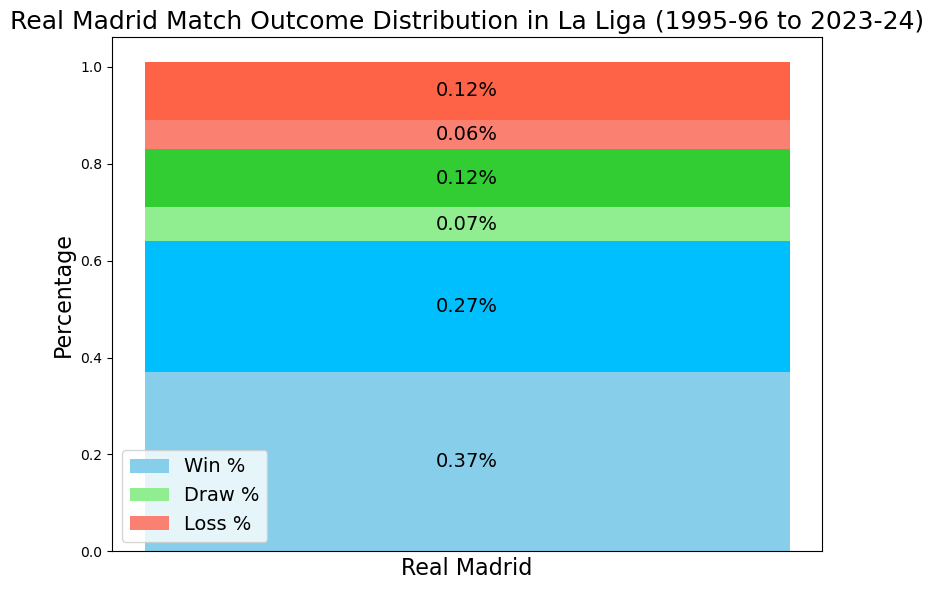

In [79]:
rates_RM = np.round(np.array(results_RM)/np.array(results_RM).sum(), 2)

# Plot the Real Madrid's match outcome rates
plt.figure(figsize=(8, 6))
bar_width = 0.2
index = np.arange(1)

# Plot Real Madrid's rates
plt.bar(index, rates_RM[0], color='skyblue', label='Win %', width=bar_width)
plt.bar(index, rates_RM[1], color='deepskyblue', width=bar_width, bottom=rates_RM[0])
plt.bar(index, rates_RM[2], color='lightgreen', label='Draw %', width=bar_width, bottom=rates_RM[0]+rates_RM[1])
plt.bar(index, rates_RM[3], color='limegreen', width=bar_width, bottom=rates_RM[0]+rates_RM[1]+rates_RM[2])
plt.bar(index, rates_RM[4], color='salmon', label='Loss %', width=bar_width, bottom=rates_RM[0]+rates_RM[1]+rates_RM[2]+rates_RM[3])
plt.bar(index, rates_RM[5], color='tomato', width=bar_width, bottom=rates_RM[0]+rates_RM[1]+rates_RM[2]+rates_RM[3]+rates_RM[4])


# Add percentage labels on top of each bar
for i, rate in enumerate(rates_RM):
    plt.text(index, sum(rates_RM[:i+1]) - rate/2, f'{rate:.2f}%', ha='center', va='center', color='black', fontsize=14)

# Adjust x-axis ticks and labels
plt.xlabel('Real Madrid', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title('Real Madrid Match Outcome Distribution in La Liga (1995-96 to 2023-24)', fontsize=18)
plt.xticks([], [])
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

The soft colors correspond to home outcomes, while the harder ones for away.

##### Real Madrid's results by seasons (1995-96 to 2023-24)

In [80]:
# List to store results per team and year
RM_results_season = []

for year in years:
    # Count results for Real Madrid
    results_RM = u.calculator(laliga_df, 'Real Madrid', int(year), results=True)
    
    # Append the year to the results
    results_RM.append(year)

    # Append the results to the list
    RM_results_season.append(results_RM)

# Create a DataFrame with the results
RM_results_df = pd.DataFrame(RM_results_season, columns=['Home Wins', 'Away Wins', 'Home Draws', 'Away Draws', 'Home Losses', 'Away Losses', 'Season'])

# Sort the DataFrame by season and then by team name
RM_results_df.sort_values(by=['Season'], inplace=True)

# Reset index after sorting
RM_results_df.reset_index(drop=True, inplace=True)

In [81]:
# Calculate total matches per season
RM_results_df['Total Matches'] = RM_results_df['Home Wins'] + RM_results_df['Away Wins'] + RM_results_df['Home Draws'] + RM_results_df['Away Draws'] + RM_results_df['Home Losses'] + RM_results_df['Away Losses']

# Calculate percentage of each result
RM_results_df['Home Win %'] = (RM_results_df['Home Wins'] / RM_results_df['Total Matches']) * 100
RM_results_df['Away Win %'] = (RM_results_df['Away Wins'] / RM_results_df['Total Matches']) * 100
RM_results_df['Home Draw %'] = (RM_results_df['Home Draws'] / RM_results_df['Total Matches']) * 100
RM_results_df['Away Draw %'] = (RM_results_df['Away Draws'] / RM_results_df['Total Matches']) * 100
RM_results_df['Home Loss %'] = (RM_results_df['Home Losses'] / RM_results_df['Total Matches']) * 100
RM_results_df['Away Loss %'] = (RM_results_df['Away Losses'] / RM_results_df['Total Matches']) * 100

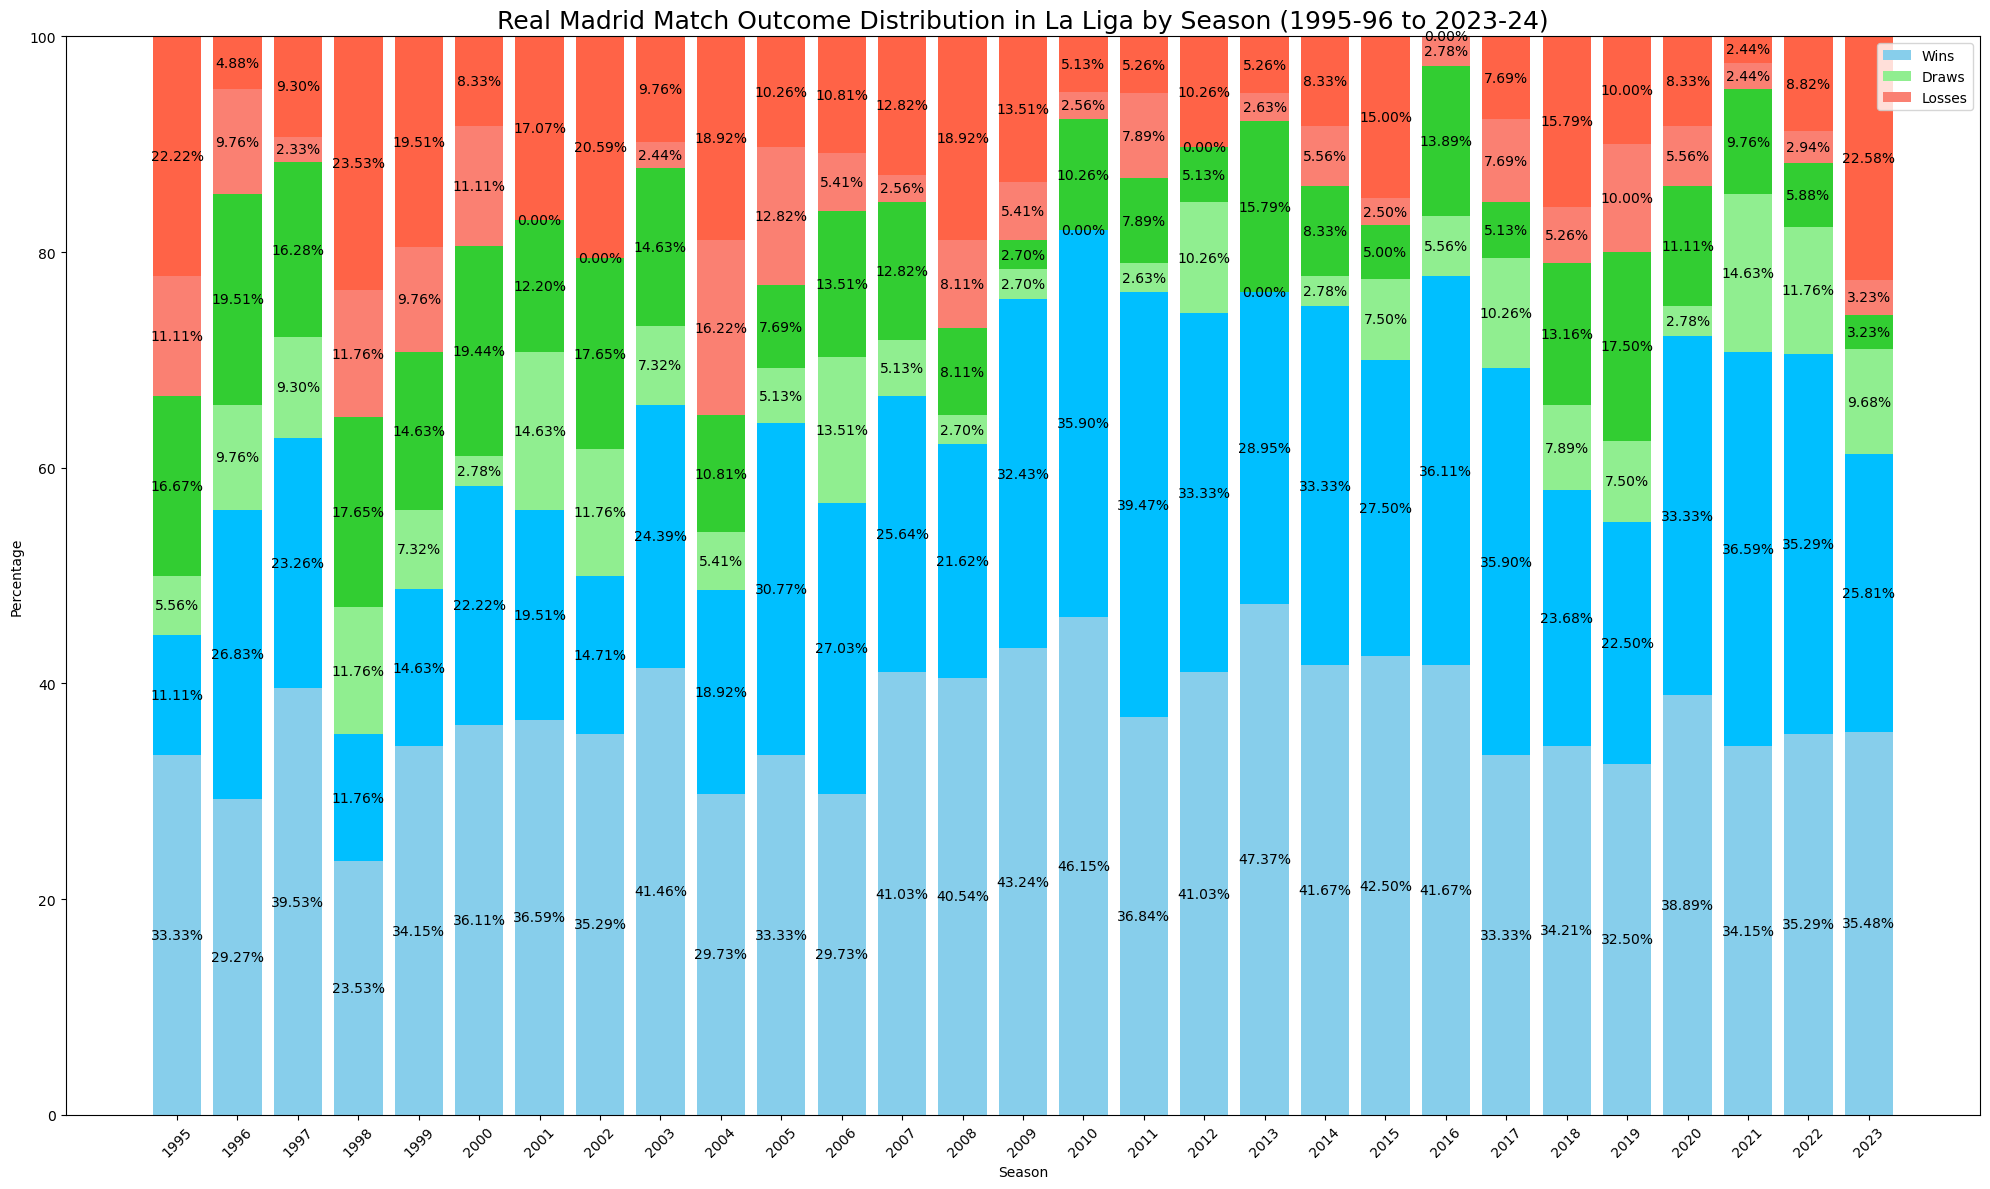

In [82]:
# Plot the results
plt.figure(figsize=(20, 12))
bar_width = 0.35
index = RM_results_df.index

plt.bar(index, RM_results_df['Home Win %'], color='skyblue', label='Wins')
plt.bar(index, RM_results_df['Away Win %'], color='deepskyblue', bottom=RM_results_df['Home Win %'])
plt.bar(index, RM_results_df['Home Draw %'], color='lightgreen', label='Draws', bottom=RM_results_df['Home Win %'] + RM_results_df['Away Win %'])
plt.bar(index, RM_results_df['Away Draw %'], color='limegreen', bottom=RM_results_df['Home Win %'] + RM_results_df['Away Win %'] + RM_results_df['Home Draw %'])
plt.bar(index, RM_results_df['Home Loss %'], color='salmon', label='Losses', bottom=RM_results_df['Home Win %'] + RM_results_df['Away Win %'] + RM_results_df['Home Draw %'] + RM_results_df['Away Draw %'])
plt.bar(index, RM_results_df['Away Loss %'], color='tomato', bottom=RM_results_df['Home Win %'] + RM_results_df['Away Win %'] + RM_results_df['Home Draw %'] + RM_results_df['Away Draw %'] + RM_results_df['Home Loss %'])

# Add percentage labels on top of each bar
for i, row in RM_results_df.iterrows():
    plt.text(i, row['Home Win %'] / 2, f'{row["Home Win %"]:.2f}%', ha='center', va='center', color='black', fontsize=10)
    plt.text(i, row['Home Win %'] + row['Away Win %'] / 2, f'{row["Away Win %"]:.2f}%', ha='center', va='center', color='black', fontsize=10)
    plt.text(i, row['Home Win %'] + row['Away Win %'] + row['Home Draw %'] / 2, f'{row["Home Draw %"]:.2f}%', ha='center', va='center', color='black', fontsize=10)
    plt.text(i, row['Home Win %'] + row['Away Win %'] + row['Home Draw %'] + row['Away Draw %'] / 2, f'{row["Away Draw %"]:.2f}%', ha='center', va='center', color='black', fontsize=10)
    plt.text(i, row['Home Win %'] + row['Away Win %'] + row['Home Draw %'] + row['Away Draw %'] + row['Home Loss %'] / 2, f'{row["Home Loss %"]:.2f}%', ha='center', va='center', color='black', fontsize=10)
    plt.text(i, row['Home Win %'] + row['Away Win %'] + row['Home Draw %'] + row['Away Draw %'] + row['Home Loss %'] + row['Away Loss %'] / 2, f'{row["Away Loss %"]:.2f}%', ha='center', va='center', color='black', fontsize=10)

# Adjust x-axis ticks and labels
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('Real Madrid Match Outcome Distribution in La Liga by Season (1995-96 to 2023-24)', fontsize=18)
plt.legend()
plt.xticks(index, RM_results_df['Season'], rotation=45)
plt.tight_layout()
plt.show()

##### Real Madrid's comebacks by seasons (1995-96 to 2023-24)

Here, a count of matches that Real Madrid was loosing at half time but ended winning (comeback) is shown, with the count of total comebacks of all teams by season.

In [83]:
# List to store comebacks per season for all teams
total_comebacks_per_season = []

# Iterate over each season
for season, season_data in laliga_df.groupby('SEASON'):

    # Filter season data according to Real Madrid mathces
    real_madrid_data = season_data[(season_data['HOME_TEAM'] == 'Real Madrid') | (season_data['AWAY_TEAM'] == 'Real Madrid')]
    # Identify Real Madrid comebacks by season
    comebacks = real_madrid_data[(real_madrid_data['HTR'] == 'A') & (real_madrid_data['FTR'] == 'H')]
    # Count the total number of comebacks in this season
    RM_comebacks = len(comebacks)
    
    # Identify comebacks of all the teams by season
    comebacks = season_data[(season_data['HTR'] == 'A') & (season_data['FTR'] == 'H')]
    # Count the total number of comebacks in this season
    total_comebacks = len(comebacks)
    # Append the result to the list
    total_comebacks_per_season.append([season, total_comebacks, RM_comebacks])

# Create a DataFrame with the results
comebacks_df = pd.DataFrame(total_comebacks_per_season, columns=['Season', 'Total Comebacks', 'RM Comebacks'])

comebacks_df

,Season,Total Comebacks,RM Comebacks
0,1995-96,9,0
1,1996-97,11,2
2,1997-98,11,0
3,1998-99,10,1
4,1999-2000,12,1
5,2000-01,9,0
6,2001-02,11,0
7,2002-03,12,2
8,2003-04,10,1
9,2004-05,16,1


#### Obtaining data of interest - La Liga

First of all, a dataframe containing different Real Madrid outcomes comparing half and full time is created.

In [84]:
# List to store results per season of Real Madrid
real_madrid_results = []

# Iterate over each season
for season, season_data in laliga_df.groupby('SEASON'):
    # Filter the data for Real Madrid's matches in the season
    real_madrid_data = season_data[(season_data['HOME_TEAM'] == 'Real Madrid') | (season_data['AWAY_TEAM'] == 'Real Madrid')]
    
    # Identify different match scenarios for Real Madrid
    real_madrid_data.loc[:, 'HT_2_FT'] = real_madrid_data.apply(
        lambda x: (
            'Lose_to_Win' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'A' and x['FTR'] == 'H') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'H' and x['FTR'] == 'A')) else
            'Draw_to_Win' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'D' and x['FTR'] == 'H') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'D' and x['FTR'] == 'A')) else 
            'Win_to_Win' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'H' and x['FTR'] == 'H') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'A' and x['FTR'] == 'A')) else
            'Lose_to_Draw' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'A' and x['FTR'] == 'D') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'H' and x['FTR'] == 'D')) else
            'Draw_to_Draw' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'D' and x['FTR'] == 'D') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'D' and x['FTR'] == 'D')) else
            'Win_to_Draw' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'H' and x['FTR'] == 'D') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'A' and x['FTR'] == 'D')) else
            'Lose_to_Lose' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'A' and x['FTR'] == 'A') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'H' and x['FTR'] == 'H')) else
            'Draw_to_Lose' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'D' and x['FTR'] == 'A') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'D' and x['FTR'] == 'H')) else
            'Win_to_Lose' if ((x['HOME_TEAM'] == 'Real Madrid' and x['HTR'] == 'H' and x['FTR'] == 'A') or (x['AWAY_TEAM'] == 'Real Madrid' and x['HTR'] == 'A' and x['FTR'] == 'H')) else ''),
        axis=1)

    
    # Count the number of occurrences of each scenario
    scenario_counts = real_madrid_data['HT_2_FT'].value_counts()
    
    # Append the results to the list
    real_madrid_results.append([season, 
                                scenario_counts.get('Lose_to_Win', 0),
                                scenario_counts.get('Lose_to_Draw', 0),
                                scenario_counts.get('Lose_to_Lose', 0),
                                scenario_counts.get('Draw_to_Win', 0),
                                scenario_counts.get('Draw_to_Draw', 0),
                                scenario_counts.get('Draw_to_Lose', 0),
                                scenario_counts.get('Win_to_Win', 0),
                                scenario_counts.get('Win_to_Draw', 0),
                                scenario_counts.get('Win_to_Lose', 0)])

# Create a DataFrame with the results
real_madrid_results_df = pd.DataFrame(real_madrid_results, 
                                       columns=['Season', 'Lose_to_Win', 'Lose_to_Draw', 'Lose_to_Lose', 'Draw_to_Win', 'Draw_to_Draw', 'Draw_to_Lose', 'Win_to_Win', 'Win_to_Draw', 'Win_to_Lose'])

In [85]:
# Display teh datafram of Real Madrid match outcomes comparing half and full time
real_madrid_results_df

,Season,Lose_to_Win,Lose_to_Draw,Lose_to_Lose,Draw_to_Win,Draw_to_Draw,Draw_to_Lose,Win_to_Win,Win_to_Draw,Win_to_Lose
0,1995-96,0,1,7,5,7,5,15,2,0
1,1996-97,3,1,2,6,9,2,18,1,0
2,1997-98,0,3,5,6,7,4,11,2,0
3,1998-99,2,1,8,5,3,4,14,1,0
4,1999-2000,2,3,7,10,6,1,4,5,0
5,2000-01,0,1,4,8,4,2,16,3,0
6,2001-02,1,1,5,5,4,5,13,4,0
7,2002-03,3,3,3,6,7,0,13,2,1
8,2003-04,2,2,8,6,5,2,13,0,0
9,2004-05,2,1,7,9,4,1,14,0,0


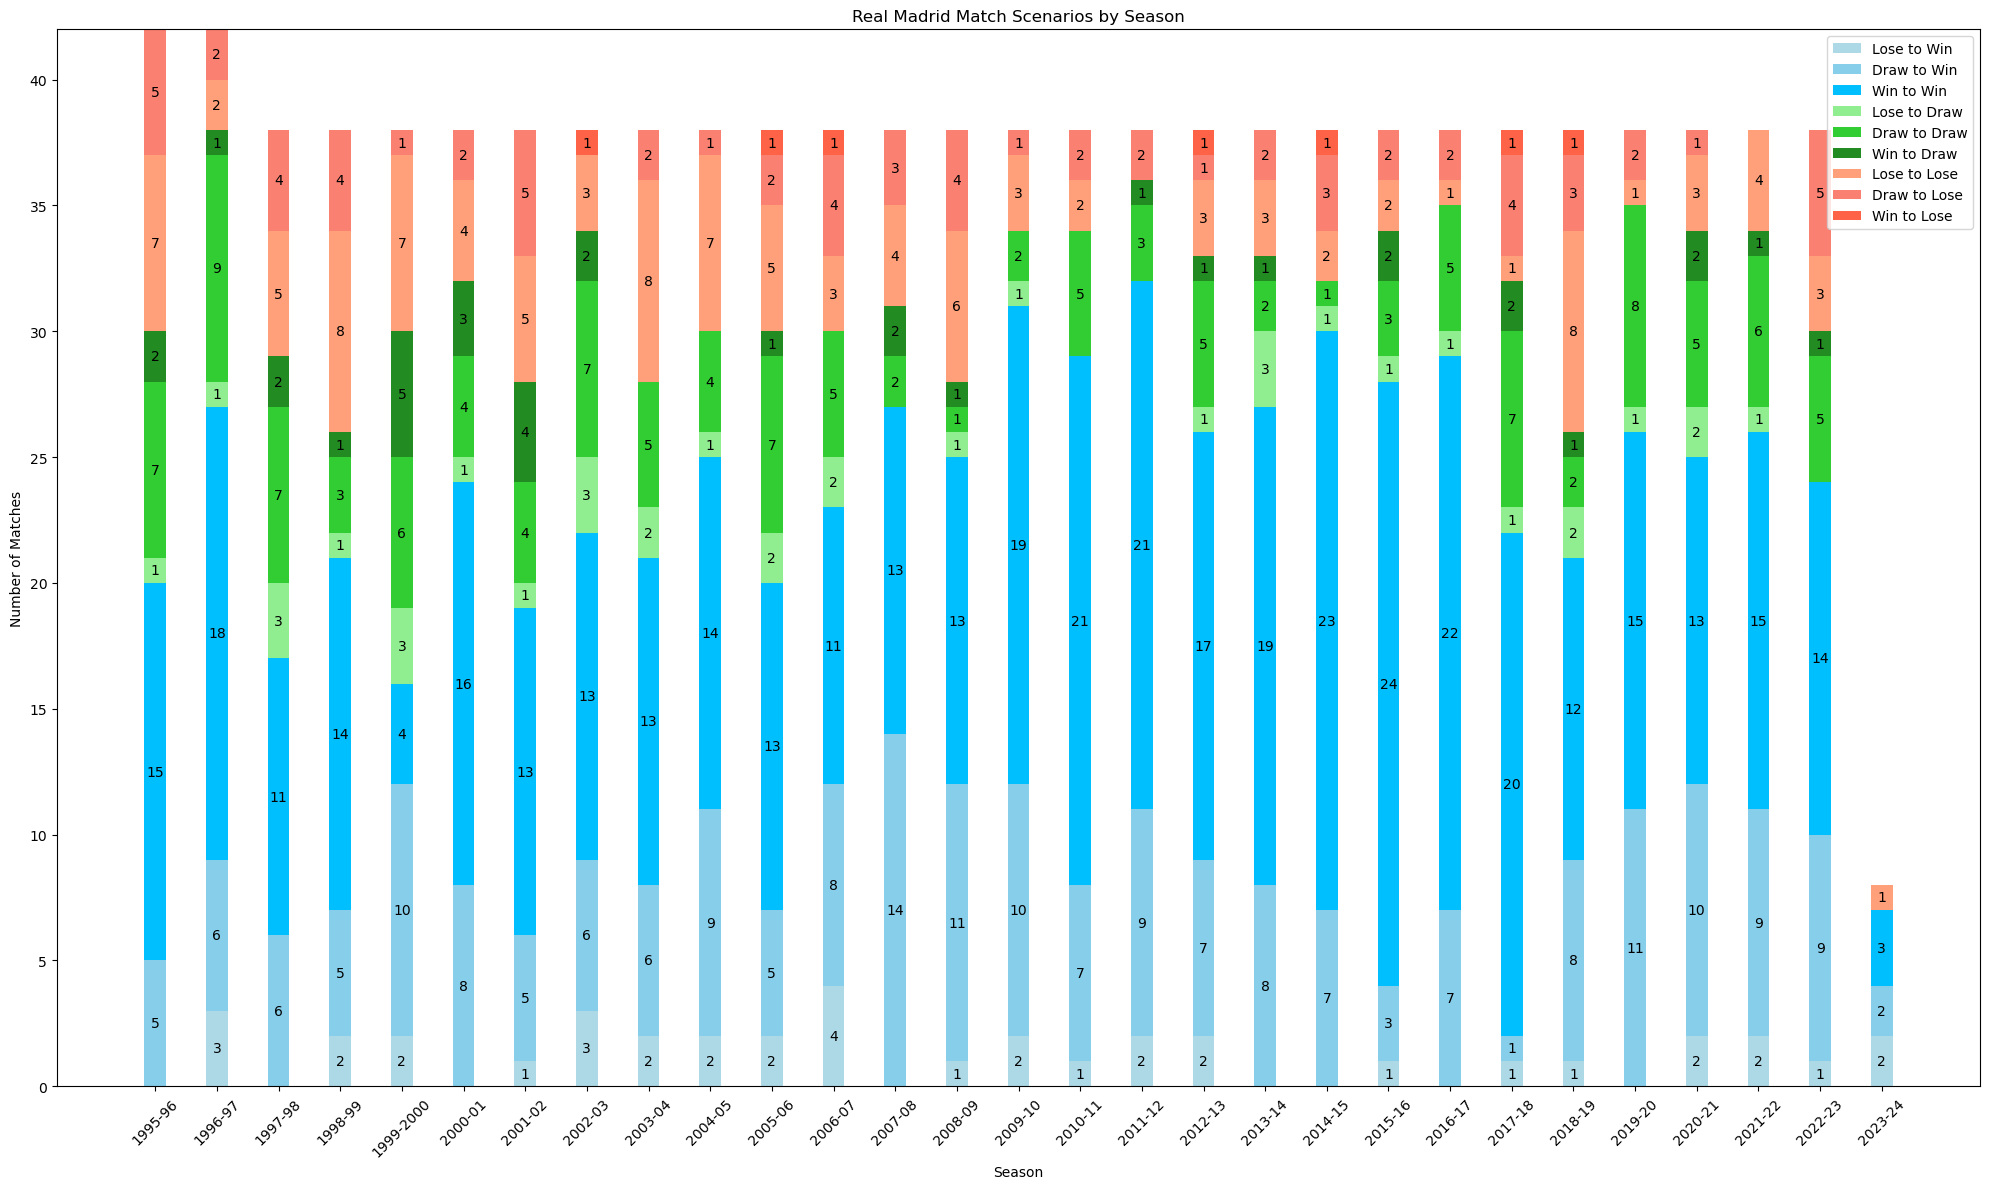

In [86]:
# Plot the results
plt.figure(figsize=(20, 12))
bar_width = 0.35
index = real_madrid_results_df.index

plt.bar(index, real_madrid_results_df['Lose_to_Win'], color='lightblue', label='Lose to Win', width=bar_width)
plt.bar(index, real_madrid_results_df['Draw_to_Win'], color='skyblue', label='Draw to Win', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'])
plt.bar(index, real_madrid_results_df['Win_to_Win'], color='deepskyblue', label='Win to Win', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'])

plt.bar(index, real_madrid_results_df['Lose_to_Draw'], color='lightgreen', label='Lose to Draw', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'] + real_madrid_results_df['Win_to_Win'])
plt.bar(index, real_madrid_results_df['Draw_to_Draw'], color='limegreen', label='Draw to Draw', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'] + real_madrid_results_df['Win_to_Win'] + real_madrid_results_df['Lose_to_Draw'])
plt.bar(index, real_madrid_results_df['Win_to_Draw'], color='forestgreen', label='Win to Draw', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'] + real_madrid_results_df['Win_to_Win'] + real_madrid_results_df['Lose_to_Draw'] + real_madrid_results_df['Draw_to_Draw'])

plt.bar(index, real_madrid_results_df['Lose_to_Lose'], color='lightsalmon', label='Lose to Lose', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'] + real_madrid_results_df['Win_to_Win'] + real_madrid_results_df['Lose_to_Draw'] + real_madrid_results_df['Draw_to_Draw'] + real_madrid_results_df['Win_to_Draw'])
plt.bar(index, real_madrid_results_df['Draw_to_Lose'], color='salmon', label='Draw to Lose', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'] + real_madrid_results_df['Win_to_Win'] + real_madrid_results_df['Lose_to_Draw'] + real_madrid_results_df['Draw_to_Draw'] + real_madrid_results_df['Win_to_Draw'] + real_madrid_results_df['Lose_to_Lose'])
plt.bar(index, real_madrid_results_df['Win_to_Lose'], color='tomato', label='Win to Lose', width=bar_width, bottom=real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'] + real_madrid_results_df['Win_to_Win'] + real_madrid_results_df['Lose_to_Draw'] + real_madrid_results_df['Draw_to_Draw'] + real_madrid_results_df['Win_to_Draw'] + real_madrid_results_df['Lose_to_Lose'] + real_madrid_results_df['Draw_to_Lose'])

# Add labels on top of each bar
for i, row in real_madrid_results_df.iterrows():
    if row['Lose_to_Win'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] / 2, f'{real_madrid_results_df["Lose_to_Win"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Draw_to_Win'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] / 2, f'{real_madrid_results_df["Draw_to_Win"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Win_to_Win'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] / 2, f'{real_madrid_results_df["Win_to_Win"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Lose_to_Draw'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] + real_madrid_results_df['Lose_to_Draw'][i] / 2, f'{real_madrid_results_df["Lose_to_Draw"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Draw_to_Draw'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] + real_madrid_results_df['Lose_to_Draw'][i] + real_madrid_results_df['Draw_to_Draw'][i] / 2, f'{real_madrid_results_df["Draw_to_Draw"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Win_to_Draw'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] + real_madrid_results_df['Lose_to_Draw'][i] + real_madrid_results_df['Draw_to_Draw'][i] + real_madrid_results_df['Win_to_Draw'][i] / 2, f'{real_madrid_results_df["Win_to_Draw"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Lose_to_Lose'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] + real_madrid_results_df['Lose_to_Draw'][i] + real_madrid_results_df['Draw_to_Draw'][i] + real_madrid_results_df['Win_to_Draw'][i] + real_madrid_results_df['Lose_to_Lose'][i] / 2, f'{real_madrid_results_df["Lose_to_Lose"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Draw_to_Lose'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] + real_madrid_results_df['Lose_to_Draw'][i] + real_madrid_results_df['Draw_to_Draw'][i] + real_madrid_results_df['Win_to_Draw'][i] + real_madrid_results_df['Lose_to_Lose'][i] + real_madrid_results_df['Draw_to_Lose'][i] / 2, f'{real_madrid_results_df["Draw_to_Lose"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Win_to_Lose'] != 0:
        plt.text(i, real_madrid_results_df['Lose_to_Win'][i] + real_madrid_results_df['Draw_to_Win'][i] + real_madrid_results_df['Win_to_Win'][i] + real_madrid_results_df['Lose_to_Draw'][i] + real_madrid_results_df['Draw_to_Draw'][i] + real_madrid_results_df['Win_to_Draw'][i] + real_madrid_results_df['Lose_to_Lose'][i] + real_madrid_results_df['Draw_to_Lose'][i] + real_madrid_results_df['Win_to_Lose'][i] / 2, f'{real_madrid_results_df["Win_to_Lose"][i]}', ha='center', va='center', color='black', fontsize=10)

# Adjust x-axis ticks and labels
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Real Madrid Match Scenarios by Season')
plt.legend()
plt.xticks(index, real_madrid_results_df['Season'], rotation=45)
plt.tight_layout()
plt.show()


Now, two columns are obtained, having both, comebacks and failures, some extra data counted to have a bigger dataset and thus obtained more coherent results.
- **Comebacks**: the sum of results starting (at half time) with a lose or a draw and ending (at full time) with a win.
- **Failures**: the sum of results starting with a lose or a draw and ending with a lose.

In [87]:
# Create the DataFrame comebacks_RM
comebacks_RM = pd.DataFrame()

# season
comebacks_RM['Season'] = laliga_df[laliga_df['SEASON'] != '2023-24']['SEASON'].unique()

# Matches per season
comebacks_RM['Matches'] = list(matches_RM['Matches'])[:-1]

# Calculate the 'winnings' column
comebacks_RM['Winnings'] = real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win'] + real_madrid_results_df['Win_to_Win']

# Calculate the 'comebacks' column
comebacks_RM['comebacks'] = real_madrid_results_df['Lose_to_Win'] + real_madrid_results_df['Draw_to_Win']

# Calculate the 'failures' column
comebacks_RM['failures'] = real_madrid_results_df['Lose_to_Lose'] + real_madrid_results_df['Draw_to_Lose']

# Show the comebacks_RM DataFrame
comebacks_RM

,Season,Matches,Winnings,comebacks,failures
0,1995-96,42,20,5,12
1,1996-97,42,27,9,4
2,1997-98,38,17,6,9
3,1998-99,38,21,7,12
4,1999-2000,38,16,12,8
5,2000-01,38,24,8,6
6,2001-02,38,19,6,10
7,2002-03,38,22,9,3
8,2003-04,38,21,8,10
9,2004-05,38,25,11,8


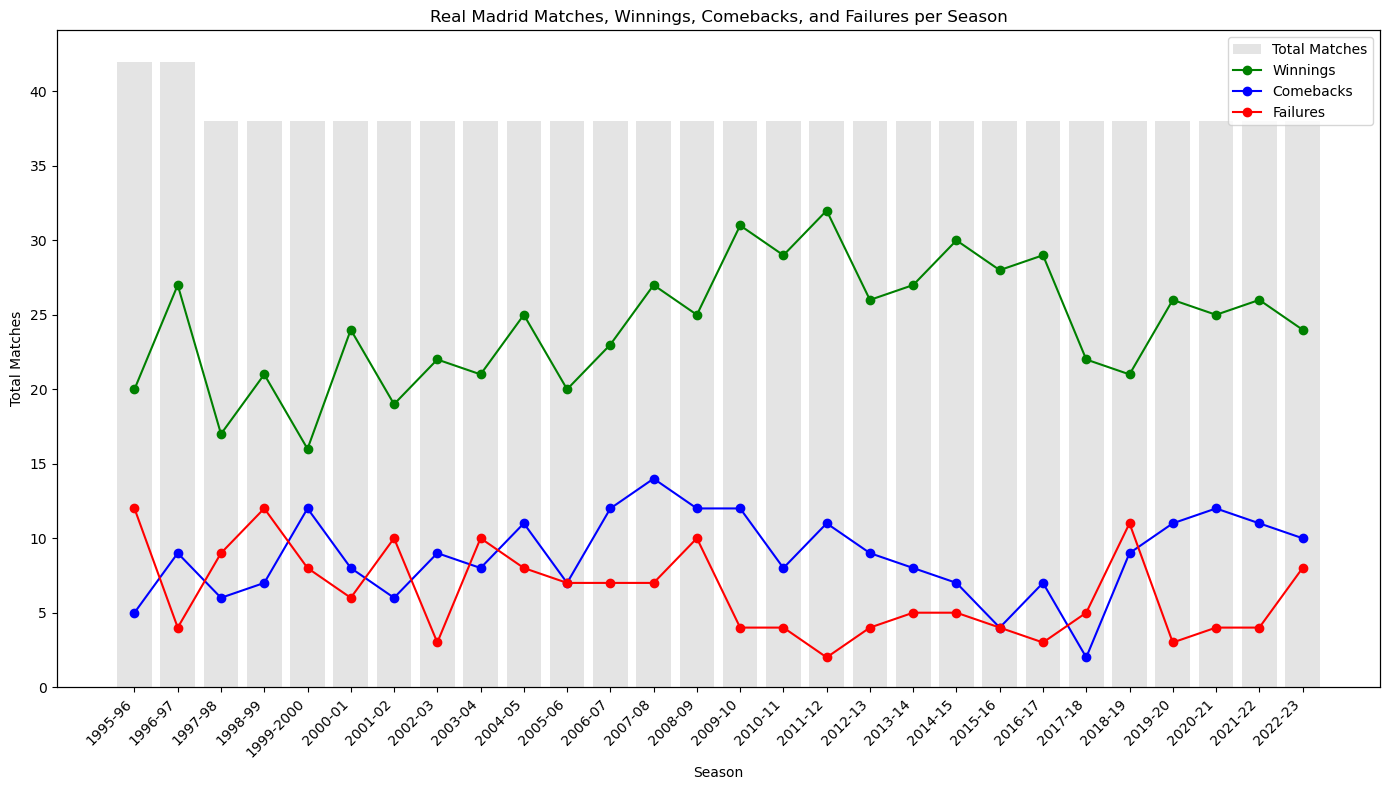

In [88]:
# Create subplots
fig, ax1 = plt.subplots(figsize=(14, 8))

# Set the x-axis values
seasons = comebacks_RM['Season']

# Plot matches as a bar plot
ax1.bar(seasons, comebacks_RM['Matches'], color='lightgrey', label='Total Matches', alpha=0.6)

# Set the labels and title
ax1.set_xlabel('Season')
ax1.set_ylabel('Total Matches')
ax1.set_title('Real Madrid Matches, Winnings, Comebacks, and Failures per Season')

# Create a secondary y-axis for winnings, comebacks, and failures
ax2 = ax1.twinx()

# Set the y-axis limits of ax2 to match ax1
ax2.set_ylim(ax1.get_ylim())

# Plot winnings, comebacks, and failures as line plots
ax2.plot(seasons, comebacks_RM['Winnings'], color='green', marker='o', linestyle='-', label='Winnings')
ax2.plot(seasons, comebacks_RM['comebacks'], color='blue', marker='o', linestyle='-', label='Comebacks')
ax2.plot(seasons, comebacks_RM['failures'], color='red', marker='o', linestyle='-', label='Failures')

# Combine the legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

# Remove the y-axis label from ax2
ax2.set_ylabel('')
ax2.yaxis.set_ticks([])

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


Now, the same will be done, but instead of doing it for Real Madrid, it will be done for all the teams.

In [89]:
# List to store results per team
team_results = []

# Get the unique teams
teams = pd.unique(laliga_df[['HOME_TEAM', 'AWAY_TEAM']].values.ravel('K'))

# Iterate over each team
for team in teams:
    # Filter the data for the team's matches
    team_data = laliga_df[(laliga_df['HOME_TEAM'] == team) | (laliga_df['AWAY_TEAM'] == team)]
    
    # Identify different match scenarios for the team
    team_data['HT_2_FT'] = team_data.apply(
        lambda x: (
            'Lose_to_Win' if ((x['HOME_TEAM'] == team and x['HTR'] == 'A' and x['FTR'] == 'H') or (x['AWAY_TEAM'] == team and x['HTR'] == 'H' and x['FTR'] == 'A')) else
            'Draw_to_Win' if ((x['HOME_TEAM'] == team and x['HTR'] == 'D' and x['FTR'] == 'H') or (x['AWAY_TEAM'] == team and x['HTR'] == 'D' and x['FTR'] == 'A')) else 
            'Win_to_Win' if ((x['HOME_TEAM'] == team and x['HTR'] == 'H' and x['FTR'] == 'H') or (x['AWAY_TEAM'] == team and x['HTR'] == 'A' and x['FTR'] == 'A')) else
            'Lose_to_Draw' if ((x['HOME_TEAM'] == team and x['HTR'] == 'A' and x['FTR'] == 'D') or (x['AWAY_TEAM'] == team and x['HTR'] == 'H' and x['FTR'] == 'D')) else
            'Draw_to_Draw' if ((x['HOME_TEAM'] == team and x['HTR'] == 'D' and x['FTR'] == 'D') or (x['AWAY_TEAM'] == team and x['HTR'] == 'D' and x['FTR'] == 'D')) else
            'Win_to_Draw' if ((x['HOME_TEAM'] == team and x['HTR'] == 'H' and x['FTR'] == 'D') or (x['AWAY_TEAM'] == team and x['HTR'] == 'A' and x['FTR'] == 'D')) else
            'Lose_to_Lose' if ((x['HOME_TEAM'] == team and x['HTR'] == 'A' and x['FTR'] == 'A') or (x['AWAY_TEAM'] == team and x['HTR'] == 'H' and x['FTR'] == 'H')) else
            'Draw_to_Lose' if ((x['HOME_TEAM'] == team and x['HTR'] == 'D' and x['FTR'] == 'A') or (x['AWAY_TEAM'] == team and x['HTR'] == 'D' and x['FTR'] == 'H')) else
            'Win_to_Lose' if ((x['HOME_TEAM'] == team and x['HTR'] == 'H' and x['FTR'] == 'A') or (x['AWAY_TEAM'] == team and x['HTR'] == 'A' and x['FTR'] == 'H')) else ''),
        axis=1)
    
    # Count the number of occurrences of each scenario
    scenario_counts = team_data['HT_2_FT'].value_counts()
    
    # Append the results to the list
    team_results.append([team, 
                         scenario_counts.get('Lose_to_Win', 0),
                         scenario_counts.get('Lose_to_Draw', 0),
                         scenario_counts.get('Lose_to_Lose', 0),
                         scenario_counts.get('Draw_to_Win', 0),
                         scenario_counts.get('Draw_to_Draw', 0),
                         scenario_counts.get('Draw_to_Lose', 0),
                         scenario_counts.get('Win_to_Win', 0),
                         scenario_counts.get('Win_to_Draw', 0),
                         scenario_counts.get('Win_to_Lose', 0)])

# Create a DataFrame with the results
team_results_df = pd.DataFrame(team_results, 
                               columns=['Team', 'Lose_to_Win', 'Lose_to_Draw', 'Lose_to_Lose', 'Draw_to_Win', 'Draw_to_Draw', 'Draw_to_Lose', 'Win_to_Win', 'Win_to_Draw', 'Win_to_Lose'])


In [90]:
team_results_df

,Team,Lose_to_Win,Lose_to_Draw,Lose_to_Lose,Draw_to_Win,Draw_to_Draw,Draw_to_Lose,Win_to_Win,Win_to_Draw,Win_to_Lose
0,La Coruna,15,48,179,105,142,81,182,37,17
1,Sp Gijon,6,13,110,32,49,64,51,17,8
2,Ath Bilbao,31,50,225,133,196,133,232,59,21
3,Atlético Madrid,20,39,145,168,153,103,312,51,12
4,Celta,12,53,173,114,124,135,170,51,20
5,Espanol,22,52,232,141,177,147,174,54,35
6,Merida,0,4,24,7,18,12,12,2,1
7,Sevilla FC,19,38,176,161,143,120,238,49,21
8,Valladolid,9,42,164,76,135,105,111,31,19
9,Vallecano,7,21,171,65,68,75,99,24,18


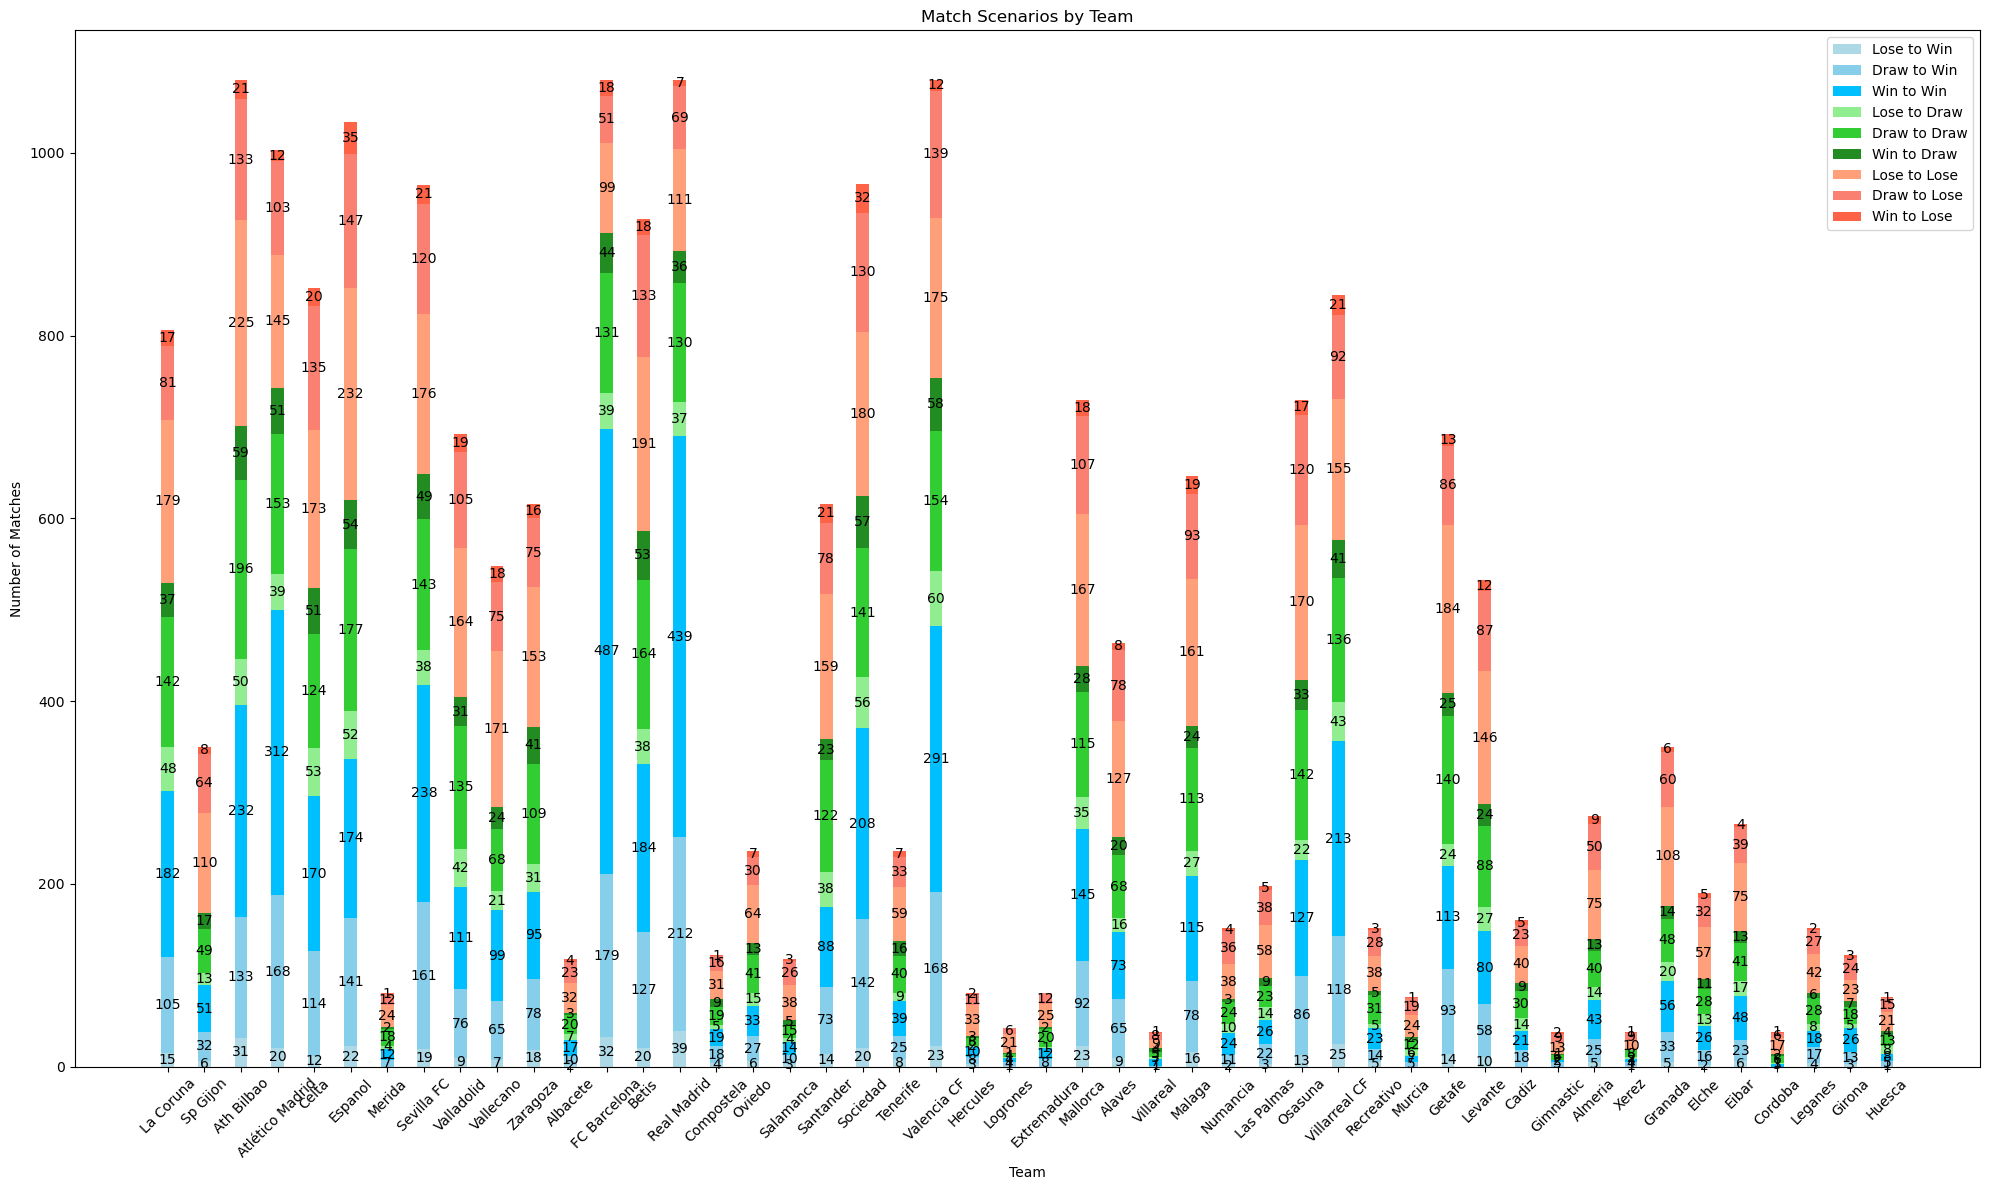

In [91]:
# Plot the results for all teams
plt.figure(figsize=(20, 12))
bar_width = 0.35
index = team_results_df.index

plt.bar(index, team_results_df['Lose_to_Win'], color='lightblue', label='Lose to Win', width=bar_width)
plt.bar(index, team_results_df['Draw_to_Win'], color='skyblue', label='Draw to Win', width=bar_width, bottom=team_results_df['Lose_to_Win'])
plt.bar(index, team_results_df['Win_to_Win'], color='deepskyblue', label='Win to Win', width=bar_width, bottom=team_results_df['Lose_to_Win'] + team_results_df['Draw_to_Win'])

plt.bar(index, team_results_df['Lose_to_Draw'], color='lightgreen', label='Lose to Draw', width=bar_width, bottom=team_results_df['Lose_to_Win'] + team_results_df['Draw_to_Win'] + team_results_df['Win_to_Win'])
plt.bar(index, team_results_df['Draw_to_Draw'], color='limegreen', label='Draw to Draw', width=bar_width, bottom=team_results_df['Lose_to_Win'] + team_results_df['Draw_to_Win'] + team_results_df['Win_to_Win'] + team_results_df['Lose_to_Draw'])
plt.bar(index, team_results_df['Win_to_Draw'], color='forestgreen', label='Win to Draw', width=bar_width, bottom=team_results_df['Lose_to_Win'] + team_results_df['Draw_to_Win'] + team_results_df['Win_to_Win'] + team_results_df['Lose_to_Draw'] + team_results_df['Draw_to_Draw'])

plt.bar(index, team_results_df['Lose_to_Lose'], color='lightsalmon', label='Lose to Lose', width=bar_width, bottom=team_results_df['Lose_to_Win'] + team_results_df['Draw_to_Win'] + team_results_df['Win_to_Win'] + team_results_df['Lose_to_Draw'] + team_results_df['Draw_to_Draw'] + team_results_df['Win_to_Draw'])
plt.bar(index, team_results_df['Draw_to_Lose'], color='salmon', label='Draw to Lose', width=bar_width, bottom=team_results_df['Lose_to_Win'] + team_results_df['Draw_to_Win'] + team_results_df['Win_to_Win'] + team_results_df['Lose_to_Draw'] + team_results_df['Draw_to_Draw'] + team_results_df['Win_to_Draw'] + team_results_df['Lose_to_Lose'])
plt.bar(index, team_results_df['Win_to_Lose'], color='tomato', label='Win to Lose', width=bar_width, bottom=team_results_df['Lose_to_Win'] + team_results_df['Draw_to_Win'] + team_results_df['Win_to_Win'] + team_results_df['Lose_to_Draw'] + team_results_df['Draw_to_Draw'] + team_results_df['Win_to_Draw'] + team_results_df['Lose_to_Lose'] + team_results_df['Draw_to_Lose'])

# Add labels on top of each bar
for i, row in team_results_df.iterrows():
    if row['Lose_to_Win'] != 0:
        plt.text(i, team_results_df['Lose_to_Win'][i] / 2, f'{team_results_df["Lose_to_Win"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Draw_to_Win'] != 0:
        plt.text(i, team_results_df['Lose_to_Win'][i] + team_results_df['Draw_to_Win'][i] / 2, f'{team_results_df["Draw_to_Win"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Win_to_Win'] != 0:
        plt.text(i, team_results_df['Lose_to_Win'][i] + team_results_df['Draw_to_Win'][i] + team_results_df['Win_to_Win'][i] / 2, f'{team_results_df["Win_to_Win"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Lose_to_Draw'] != 0:
        plt.text(i, team_results_df['Lose_to_Win'][i] + team_results_df['Draw_to_Win'][i] + team_results_df['Win_to_Win'][i] + team_results_df['Lose_to_Draw'][i] / 2, f'{team_results_df["Lose_to_Draw"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Draw_to_Draw'] != 0:
        plt.text(i, team_results_df['Lose_to_Win'][i] + team_results_df['Draw_to_Win'][i] + team_results_df['Win_to_Win'][i] + team_results_df['Lose_to_Draw'][i] + team_results_df['Draw_to_Draw'][i] / 2, f'{team_results_df["Draw_to_Draw"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Win_to_Draw'] != 0:
        plt.text(i, team_results_df['Lose_to_Win'][i] + team_results_df['Draw_to_Win'][i] + team_results_df['Win_to_Win'][i] + team_results_df['Lose_to_Draw'][i] + team_results_df['Draw_to_Draw'][i] + team_results_df['Win_to_Draw'][i] / 2, f'{team_results_df["Win_to_Draw"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Lose_to_Lose'] != 0:
        plt.text(i, team_results_df['Lose_to_Win'][i] + team_results_df['Draw_to_Win'][i] + team_results_df['Win_to_Win'][i] + team_results_df['Lose_to_Draw'][i] + team_results_df['Draw_to_Draw'][i] + team_results_df['Win_to_Draw'][i] + team_results_df['Lose_to_Lose'][i] / 2, f'{team_results_df["Lose_to_Lose"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Draw_to_Lose'] != 0:
        plt.text(i, team_results_df['Lose_to_Win'][i] + team_results_df['Draw_to_Win'][i] + team_results_df['Win_to_Win'][i] + team_results_df['Lose_to_Draw'][i] + team_results_df['Draw_to_Draw'][i] + team_results_df['Win_to_Draw'][i] + team_results_df['Lose_to_Lose'][i] + team_results_df['Draw_to_Lose'][i] / 2, f'{team_results_df["Draw_to_Lose"][i]}', ha='center', va='center', color='black', fontsize=10)
    if row['Win_to_Lose'] != 0:
        plt.text(i, team_results_df['Lose_to_Win'][i] + team_results_df['Draw_to_Win'][i] + team_results_df['Win_to_Win'][i] + team_results_df['Lose_to_Draw'][i] + team_results_df['Draw_to_Draw'][i] + team_results_df['Win_to_Draw'][i] + team_results_df['Lose_to_Lose'][i] + team_results_df['Draw_to_Lose'][i] + team_results_df['Win_to_Lose'][i] / 2, f'{team_results_df["Win_to_Lose"][i]}', ha='center', va='center', color='black', fontsize=10)

# Adjust x-axis ticks and labels
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.title('Match Scenarios by Team')
plt.legend()
plt.xticks(index, team_results_df['Team'], rotation=45)
plt.tight_layout()
plt.show()

In [92]:
# Create an empty DataFrame to store the comebacks for all teams
comebacks_all_teams = pd.DataFrame()

# Iterate over each team in the team_results_df DataFrame
for index, row in team_results_df.iterrows():
    # Calculate the comebacks for each team
    comebacks_team = pd.DataFrame({
        'Team': row['Team'],
        'Matches': row.drop(['Team']).sum(),  # Total matches
        'Winnings': row['Lose_to_Win'] + row['Draw_to_Win'] + row['Win_to_Win'],
        'comebacks': row['Lose_to_Win'] + row['Draw_to_Win'],
        'failures': row['Lose_to_Lose'] + row['Draw_to_Draw'] + row['Draw_to_Lose']
    }, index=[0])  # Ensure DataFrame has only one row
    
    # Append the comebacks for the current team to the comebacks_all_teams DataFrame
    comebacks_all_teams = pd.concat([comebacks_all_teams, comebacks_team], ignore_index=True)

# Show the comebacks for all teams
comebacks_all_teams


,Team,Matches,Winnings,comebacks,failures
0,La Coruna,806,302,120,402
1,Sp Gijon,350,89,38,223
2,Ath Bilbao,1080,396,164,554
3,Atlético Madrid,1003,500,188,401
4,Celta,852,296,126,432
5,Espanol,1034,337,163,556
6,Merida,80,19,7,54
7,Sevilla FC,965,418,180,439
8,Valladolid,692,196,85,404
9,Vallecano,548,171,72,314


#### Normality Test - La Liga

In assessing the normality of a dataset concerning proportions, two crucial considerations emerge: independence and adherence to the Success-Failure rule (10 & 10). Regarding independence, while teams engage in matches with each other across various seasons, including two encounters within each season, it is assumed that these matches remain independent entities. This assumption stems from the absence of a discernible relationship between seasons and the nature of the competition, which is characterized by league play rather than a knockout format. As for the Success-Failure rule, its fulfillment is readily apparent in the following code. To formalize, this rule stipulates that sample proportions approach a normal distribution if both the number of successes and failures are at least ten. 

First of all the total comebacks and total failures for Real Madrid on all the available seasons are computed.

In [93]:
# Calculate the total number of matches
total_matches_RM = np.array(matches_RM['Matches']).sum()
print(f"Total matches of Real Madrid: {total_matches_RM}")

# Calculate the total number of winnings
total_winnings_RM = comebacks_RM['Winnings'].sum()
print(f"Total winnings of Real Madrid: {total_winnings_RM}")

# Calculate the total number of successes
total_comebacks_RM = comebacks_RM['comebacks'].sum()
print(f"Comebacks of Real Madrid: {total_comebacks_RM}")

# Calculate the total number of failures
total_failures_RM = comebacks_RM['failures'].sum()
print(f"Failures of Real Madrid: {total_failures_RM}")

Total matches of Real Madrid: 1080
Total winnings of Real Madrid: 683
Comebacks of Real Madrid: 247
Failures of Real Madrid: 179


Second, the same is done but for all the teams and matches that were played.

In [94]:
# Calculate the total number of matches
total_matches = comebacks_all_teams['Matches'].sum()
print(f"Total matches: {total_matches}")

# Calculate the total number of winnings
total_winnings = comebacks_all_teams['Winnings'].sum()
print(f"Total winnings: {total_winnings}")

# Calculate the total number of successes
total_comebacks = comebacks_all_teams['comebacks'].sum()
print(f"Comebacks: {total_comebacks}")

# Calculate the total number of failures
total_failures = comebacks_all_teams['failures'].sum()
print(f"Failures: {total_failures}")

Total matches: 21766
Total winnings: 8102
Comebacks: 3374
Failures: 11109


#### Hypothesis testing - La Liga

##### Test for Proportions - **Total Real Madrid comebacks**

**Two Sample Test - Case 1**

###### Real Madrid comebacks vs Total comebacks:

For this first case of a two sample test, Real Madrid comebacks will be compared with the total comebacks of all the teams
Now, the total observations will be also computed for two sample. In this case it does not make sense to take every Real Madrid match that played along each of the seasons, but just those in which we are making the comparison, comebacks and failures.

Stating the hypothesis testing:

- **Null Hypothesis (H0)**: There is no significant difference in the proportion of Real Madrid and total comebacks.
- **Alternative Hypothesis (H1)**: There is a significant difference in the proportion of Real Madrid and total comebacks.

$$H_0: p_{\text{RM\_comebacks}} = p_{\text{total\_comebacks}} \quad\text{vs}\quad H_1: p_{\text{RM\_comebacks}} \neq p_{\text{total\_comebacks}}$$

Which can also be written as:

$$H_0: p = 0 \quad\text{vs}\quad H_1: p \neq 0$$

Having,

$$p = p_{\text{RM\_comebacks}} - p_{\text{total\_comebacks}}$$

It is worth noting that \(p\) represents the difference in proportions of comebacks ($p_{\text{comebacks}}$) and failures ($p_{\text{failures}}$) for Real Madrid.
- $p_{\text{RM\_comebacks}}$: Proportion for Real Madrid comebacks.
- $p_{\text{total\_comebacks}}$: Proportion for Real Madrid failures.

In [95]:
# Perform z-test for proportions
z_score, p_value = proportions_ztest([total_comebacks_RM, total_comebacks], [total_matches_RM, total_matches], alternative='two-sided')



print(f"\nz-score: {round(z_score,3)}")
print(f"p-value: {p_value}")

# Interpret the results
if p_value < alpha:
    print(f"\nReject the null hypothesis. There is a statistically significant difference between the proportion of Real Madrid comebacks ({round(total_comebacks_RM/total_matches_RM*100,2)}%) and total comebacks in the competition ({round(total_comebacks/total_matches*100,2)}&).")
else:
    print(f"\nFail to reject the null hypothesis. There is no statistically significant between the proportion of Real Madrid comebacks and total comebacks in the competition.")


z-score: 6.473
p-value: 9.636605885697143e-11

Reject the null hypothesis. There is a statistically significant difference between the proportion of Real Madrid comebacks (22.87%) and total comebacks in the competition (15.5&).


**Two Sample Test -  Case 2**

###### Real Madrid comebacks vs Real Madrid failures:

Now, the total observations will be also computed for two sample. In this case it does not make sense to take every Real Madrid match that played along each of the seasons, but just those in which we are making the comparison, comebacks and failures.

Stating the hypothesis testing:

- **Null Hypothesis (H0)**: There is no significant difference in the proportion of comebacks and failures for Real Madrid.
- **Alternative Hypothesis (H1)**: There is a significant difference in the proportion of comebacks and failures for Real Madrid.

$$H_0: p_{\text{comebacks}} = p_{\text{failures}} \quad\text{vs}\quad H_1: p_{\text{comebacks}} \neq p_{\text{failures}}$$

Which can also be written as:

$$H_0: p = 0 \quad\text{vs}\quad H_1: p \neq 0$$

Having,

$$p = p_{\text{comebacks}} - p_{\text{failures}}$$

It is worth noting that \(p\) represents the difference in proportions of comebacks ($p_{\text{comebacks}}$) and failures ($p_{\text{failures}}$) for Real Madrid.
- $p_{\text{comebacks}}$: Proportion for Real Madrid comebacks.
- $p_{\text{failures}}$: Proportion for Real Madrid failures.

In [96]:
# Perform z-test for proportions
z_score, p_value = proportions_ztest([total_comebacks_RM, total_failures_RM], [total_matches_RM, total_matches_RM], alternative='two-sided')

print(f"\nz-score: {z_score}")
print(f"p-value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("\nReject the null hypothesis. There is a statistically significant difference between the proportion of comebacks and failures.")
    if total_failures_RM > total_comebacks_RM:
        print(f"It is clearly seen that failures ({round(total_failures_RM/total_matches_RM*100,2)}%) are way bigger compared to comebacks ({round(total_comebacks_RM/total_matches_RM*100,2)}%).")
    elif total_comebacks_RM > total_failures_RM:
        print(f"It is clearly seen that comebacks ({round(total_comebacks_RM/total_matches_RM*100,2)}%) are way bigger compared to failures ({round(total_failures_RM/total_matches_RM*100,2)}%).")
else:
    print("\nFail to reject the null hypothesis. There is no statistically significant between the proportion of comebacks and failures.")


z-score: 3.6771084782153736
p-value: 0.0002358927421618342

Reject the null hypothesis. There is a statistically significant difference between the proportion of comebacks and failures.
It is clearly seen that comebacks (22.87%) are way bigger compared to failures (16.57%).


#### Champions League Analysis

First of all, the Champions League dataset will be filtered to just obtained the knockout matches of Real Madrid.

#### EDA - Champions League

In [97]:
# Filter out the first 96 matches of each season (group phase) and the last one (finals)
knockouts = ucl_df.groupby('SEASON').apply(lambda x: x.iloc[96:-1])

# Filter the games involving Real Madrid
real_madrid_games = knockouts[(knockouts['HOME_TEAM'] == 'Real Madrid') | (knockouts['AWAY_TEAM'] == 'Real Madrid')]

# Display the result
real_madrid_games

MATCH_ID     SEASON           DATE_TIME            HOME_TEAM  \
SEASON                                                                       
2016-2017 717    mt718  2016-2017 2017-02-15 19:45:00          Real Madrid   
          723    mt724  2016-2017 2017-03-07 19:45:00           SSC Napoli   
          734    mt735  2016-2017 2017-04-12 19:45:00       Bayern München   
          736    mt737  2016-2017 2017-04-18 19:45:00          Real Madrid   
          739    mt740  2016-2017 2017-05-02 19:45:00          Real Madrid   
          742    mt743  2016-2017 2017-05-10 19:45:00      Atlético Madrid   
2017-2018 593    mt594  2017-2018 2018-02-14 19:45:00          Real Madrid   
          599    mt600  2017-2018 2018-03-06 19:45:00  Paris Saint-Germain   
          607    mt608  2017-2018 2018-04-03 19:45:00             Juventus   
          613    mt614  2017-2018 2018-04-11 19:45:00          Real Madrid   
          615    mt616  2017-2018 2018-04-25 19:45:00       Bayern München   
          616    mt617  2017-2018 2018-05-01 19:45:00          Real Madrid   
2018-2019 468    mt469  2018-2019 2019-02-13 20:00:00             AFC Ajax   
          474    mt475  2018-2019 2019-03-05 20:00:00          Real Madrid   
2019-2020 352    mt353  2019-2020 2020-02-26 20:00:00          Real Madrid   
          358    mt359  2019-2020 2020-08-07 20:00:00      Manchester City   
2020-2021 228    mt229  2020-2021 2021-02-24 20:00:00             Atalanta   
          234    mt235  2020-2021 2021-03-16 20:00:00          Real Madrid   
          238    mt239  2020-2021 2021-04-06 20:00:00          Real Madrid   
          244    mt245  2020-2021 2021-04-14 20:00:00         Liverpool FC   
          245    mt246  2020-2021 2021-04-27 20:00:00          Real Madrid   
          248    mt249  2020-2021 2021-05-05 20:00:00           Chelsea FC   
2021-2022 97      mt98  2021-2022 2022-02-15 20:00:00  Paris Saint-Germain   
          107    mt108  2021-2022 2022-03-09 20:00:00          Real Madrid   
          114    mt115  2021-2022 2022-04-06 20:00:00           Chelsea FC   
          116    mt117  2021-2022 2022-04-12 20:00:00          Real Madrid   
          120    mt121  2021-2022 2022-04-26 20:00:00      Manchester City   
          123    mt124  2021-2022 2022-05-04 20:00:00          Real Madrid   

                         AWAY_TEAM              STADIUM  FTHG  FTAG  \
SEASON                                                                
2016-2017 717           SSC Napoli    Santiago Bernabéu     3     1   
          723          Real Madrid       Diego Maradona     1     3   
          734          Real Madrid        Allianz Arena     1     2   
          736       Bayern München    Santiago Bernabéu     4     2   
          739      Atlético Madrid    Santiago Bernabéu     3     0   
          742          Real Madrid     Vicente Calderón     2     1   
2017-2018 593  Paris Saint-Germain    Santiago Bernabéu     3     1   
          599          Real Madrid     Parc des Princes     1     2   
          607          Real Madrid      Allianz Stadium     0     3   
          613             Juventus    Santiago Bernabéu     1     3   
          615          Real Madrid        Allianz Arena     1     2   
          616       Bayern München    Santiago Bernabéu     2     2   
2018-2019 468          Real Madrid  Johan Cruijff ArenA     1     2   
          474             AFC Ajax    Santiago Bernabéu     1     4   
2019-2020 352      Manchester City    Santiago Bernabéu     1     2   
          358          Real Madrid       Etihad Stadium     2     1   
2020-2021 228          Real Madrid       Gewiss Stadium     0     1   
          234             Atalanta   Alfredo Di Stéfano     3     1   
          238         Liverpool FC   Alfredo Di Stéfano     3     1   
          244          Real Madrid              Anfield     0     0   
          245           Chelsea FC   Alfredo Di Stéfano     1     1   
          248          Real Madrid      

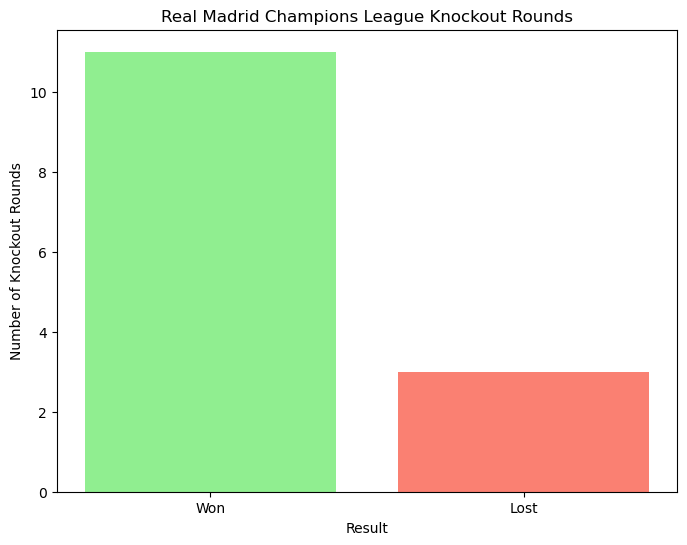

In [98]:
# Create variables to store the number of knockout rounds won and lost by Real Madrid
knockouts_won = 0
knockouts_lost = 0

# Iterate over pairs of rows to analyze each knockout round
for i in range(0, len(real_madrid_games), 2):
    # Get the home and away matches for each knockout round
    home_match = real_madrid_games.iloc[i]
    away_match = real_madrid_games.iloc[i + 1]
    
    # Calculate the total goals scored by Real Madrid in the home and away matches
    if home_match['HOME_TEAM'] == 'Real Madrid':
        RM_goals = home_match['FTHG'] + away_match['FTAG']
        opponent_goals = home_match['FTAG'] + away_match['FTHG']

    elif home_match['AWAY_TEAM'] == 'Real Madrid':
        RM_goals =  home_match['FTAG'] + away_match['FTHG']
        opponent_goals = home_match['FTHG'] + away_match['FTAG']
    
    # Determine the result of the knockout round based on total goals
    if RM_goals > opponent_goals:
        knockouts_won += 1
    elif RM_goals < opponent_goals:
        knockouts_lost += 1

# Create a bar plot to visualize the results
plt.figure(figsize=(8, 6))
plt.bar(['Won', 'Lost'], [knockouts_won, knockouts_lost], color=['lightgreen', 'salmon'])
plt.title('Real Madrid Champions League Knockout Rounds')
plt.xlabel('Result')
plt.ylabel('Number of Knockout Rounds')
plt.show()

In [99]:
# Create a variable to store the number of comebacks won by Real Madrid
comebacks_won = 0

# Iterate over pairs of rows to analyze each knockout round
for i in range(0, len(real_madrid_games), 2):
    # Get the home and away matches for each knockout round
    home_match = real_madrid_games.iloc[i]
    away_match = real_madrid_games.iloc[i + 1]

    # Check if Real Madrid lost the first match and won the comeback
    if home_match['HOME_TEAM'] == 'Real Madrid' and home_match['FTHG'] < home_match['FTAG']:
        if home_match['FTHG'] + away_match['FTAG'] > home_match['FTAG'] + away_match['FTHG']:
            comebacks_won += 1
    elif home_match['AWAY_TEAM'] == 'Real Madrid' and home_match['FTAG'] < home_match['FTHG']:
        if home_match['FTAG'] + away_match['FTHG'] > home_match['FTHG'] + away_match['FTAG']:
            comebacks_won += 1

# Print the number of comebacks won by Real Madrid
print("Number of comebacks won by Real Madrid:", comebacks_won)

Number of comebacks won by Real Madrid: 2


In [100]:
# Iterate over pairs of rows to analyze each knockout round
print("------------")
for i in range(0, len(real_madrid_games), 2):
    # Get the home and away matches for each knockout round
    home_match = real_madrid_games.iloc[i]
    away_match = real_madrid_games.iloc[i + 1]

    # Check if Real Madrid lost the first match and won the comeback
    if home_match['HOME_TEAM'] == 'Real Madrid' and home_match['FTHG'] < home_match['FTAG']:
        if home_match['FTHG'] + away_match['FTAG'] > home_match['FTAG'] + away_match['FTHG']:
            print("First Leg: {} {} - {} {}".format(home_match['HOME_TEAM'], home_match['FTHG'], home_match['AWAY_TEAM'], home_match['FTAG']))
            print("Second Leg: {} {} - {} {}".format(away_match['AWAY_TEAM'], away_match['FTAG'], away_match['HOME_TEAM'], away_match['FTHG']))
            print("------------")
    elif home_match['AWAY_TEAM'] == 'Real Madrid' and home_match['FTAG'] < home_match['FTHG']:
        if home_match['FTAG'] + away_match['FTHG'] > home_match['FTHG'] + away_match['FTAG']:
            print("First Leg: {} {} - {} {}".format(home_match['HOME_TEAM'], home_match['FTHG'], home_match['AWAY_TEAM'], home_match['FTAG']))
            print("Second Leg: {} {} - {} {}".format(away_match['AWAY_TEAM'], away_match['FTAG'], away_match['HOME_TEAM'], away_match['FTHG']))
            print("------------")

------------
First Leg: Paris Saint-Germain 1 - Real Madrid 0
Second Leg: Paris Saint-Germain 1 - Real Madrid 3
------------
First Leg: Manchester City 4 - Real Madrid 3
Second Leg: Manchester City 1 - Real Madrid 3
------------


#### Conclusion

Firstly, it's important to note that no testing was conducted on the Champions League dataset due to insufficient data. With only 14 knockout rounds available for analysis, there were only two instances of comebacks identified.

Regarding La Liga dataset, two tests comparing proportions were conducted:

1. The first 'Two Sample' test, compared Real Madrid comebacks to the total number of comebacks of all the teams reasembling a statistically significant difference between both proportions, seing that the performance Real Madrid tendency to overcome complications in the form of comebacks is greater than in the rest of the teams.

2. The second test, a 'Two Sample' test, compared comebacks to failures shwoing a statistically significant difference between the proportion of comebacks and failures, being bigger that of the comebacks, seing that it does not have statistical meaning for Real Madrid to be loosing at half time as it has high probability to overcome the situation.

Therefore, according to the results obtained, Real Madrid's tendency to stage complications is a notable aspect of its performance which suggests that its comebacks are likely attributable to more than mere luck, such as the team's winning DNA. This debate needs further analysis and consideration in understanding the team's dynamics and strategies, as the data provided only stated the half and full time results, only being able to analyze a sample of all the comebacks that Real Madrid has performed. Also, it would be curious to extend this study with a Champions League dataset, as the gratness of this team in the European competitions is well known.

## Discussion

